##### Import relevant libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##### Import relevant tables:

In [2]:
df_patient = pd.read_csv('data/patient_group.csv')
df_chart = pd.read_csv('data/chartevents_new.csv')
df_lab = pd.read_csv('data/labevents_pre_extub.csv')

In [3]:
df_patient.head()

,label,hadm_id,icustay_id,SUBJECT_ID,gender,admittime,dob,sub_age,last_icd9_code,numb_diagn,last_careunit,los,tracheo
0,1,100016,217590,68591,M,2188-05-24 15:06:00,2132-11-19 00:00:00,56.0,V441,11,MICU,6.1731,1
1,1,100017,258320,16229,M,2103-03-11 01:54:00,2075-11-10 00:00:00,28.0,3017,8,MICU,0.6924,0
2,1,100035,245719,48539,M,2115-02-22 07:51:00,2078-08-09 00:00:00,37.0,4280,26,MICU,10.5061,0
3,1,100063,241782,69282,M,2181-04-20 14:00:00,2135-04-05 00:00:00,46.0,311,11,MICU,1.6501,0
4,1,100087,294404,42255,M,2126-11-01 18:47:00,2069-11-06 00:00:00,57.0,4280,18,CCU,3.7287,0


In [4]:
df_patient.shape

(5848, 13)

In [5]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5848 entries, 0 to 5847
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   label           5848 non-null   int64  
 1   hadm_id         5848 non-null   int64  
 2   icustay_id      5848 non-null   int64  
 3   SUBJECT_ID      5848 non-null   int64  
 4   gender          5848 non-null   object 
 5   admittime       5848 non-null   object 
 6   dob             5848 non-null   object 
 7   sub_age         5848 non-null   float64
 8   last_icd9_code  5848 non-null   object 
 9   numb_diagn      5848 non-null   int64  
 10  last_careunit   5848 non-null   object 
 11  los             5848 non-null   float64
 12  tracheo         5848 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 594.1+ KB


In [6]:
df_patient.icustay_id.nunique()

5848

In [7]:
df_chart.head()

,hadm_id,icustay_id,itemid,charttime,value,valuenum,valueuom,item,storetime,cgid,warning,error,resultstatus,stopped
0,100016.0,217590.0,220045.0,2188-05-28 08:00:00,91,91.0,bpm,hr,2188-05-28 08:02:00,15623.0,0.0,0.0,NaN,NaN
1,100016.0,217590.0,220181.0,2188-05-28 08:00:00,88,88.0,mmHg,blood_pr,2188-05-28 08:02:00,15623.0,0.0,0.0,NaN,NaN
2,100016.0,217590.0,220210.0,2188-05-28 08:00:00,18,18.0,insp/min,resp_rat,2188-05-28 08:02:00,15623.0,0.0,0.0,NaN,NaN
3,100016.0,217590.0,220339.0,2188-05-28 08:00:00,5,5.0,cmH2O,PEEP,2188-05-28 07:36:00,20803.0,0.0,0.0,NaN,NaN
4,100016.0,217590.0,220546.0,2188-05-28 05:16:00,10.7,10.7,K/uL,leuko,2188-05-28 06:05:00,20889.0,0.0,0.0,NaN,NaN


In [8]:
df_chart.icustay_id.nunique()

5952

In [9]:
df_lab.head()

,hadm_id,icustay_id,itemid,value,ts,item
0,100016,217590.0,50802,2,2188-05-24 17:24:00,base_excess
1,100016,217590.0,50820,7.43,2188-05-24 17:24:00,pH
2,100016,217590.0,50821,86,2188-05-24 17:24:00,Pa02
3,100016,217590.0,50912,1.1,2188-05-28 04:16:00,creatinin
4,100016,217590.0,51221,31.1,2188-05-28 04:16:00,hct


In [10]:
df_lab.shape

(35188, 6)

In [11]:
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35188 entries, 0 to 35187
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hadm_id     35188 non-null  int64  
 1   icustay_id  35188 non-null  float64
 2   itemid      35188 non-null  int64  
 3   value       35188 non-null  object 
 4   ts          35188 non-null  object 
 5   item        35188 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.6+ MB


In [12]:
df_lab[df_lab.icustay_id==200006]

,hadm_id,icustay_id,itemid,value,ts,item
31277,189514,200006.0,50912,0.8,2159-09-04 02:17:00,creatinin
31278,189514,200006.0,51221,24.8,2159-09-04 05:21:00,hct
31279,189514,200006.0,51222,8.7,2159-09-04 05:21:00,hb


In [13]:
df_lab.icustay_id.nunique()

5937

In df_patient sind 5848 verschieden icustay_ids, in df_lab aber 5937.   
In df_lab sind also icustay_ids von Patienten enthalten, die wir später aus der Patientengruppe geschmissen haben. Das macht aber nichts, da dieses beim mergen nicht mitgenommen werden.

##### Merge df_patient with df_lab on icustay_id

In [14]:
pivot_table = df_lab.pivot_table(index='icustay_id',
                                     columns='item', 
                                     values='value',
                                     aggfunc=lambda x: ' '.join(x))

In [15]:
pivot_table.shape

(5937, 6)

In [16]:
pivot_table.head()

item,Pa02,base_excess,creatinin,hb,hct,pH
icustay_id,,,,,,
200006.0,NaN,NaN,0.8,8.7,24.8,NaN
200059.0,110,0,0.7,9.6,28.5,7.47
200063.0,78,0,2.6,8.3,24.3,7.51
200065.0,101,0,3.2,11.4,32.9,7.36
200077.0,66,-3,4.4,10.2,29.9,7.35


In [17]:
df_patient_lab = df_patient.merge(right=pivot_table, how= 'inner' , on='icustay_id')

In [18]:
df_patient_lab.head()

,label,hadm_id,icustay_id,SUBJECT_ID,gender,admittime,dob,sub_age,last_icd9_code,numb_diagn,last_careunit,los,tracheo,Pa02,base_excess,creatinin,hb,hct,pH
0,1,100016,217590,68591,M,2188-05-24 15:06:00,2132-11-19 00:00:00,56.0,V441,11,MICU,6.1731,1,86,2,1.1,10.3,31.1,7.43
1,1,100017,258320,16229,M,2103-03-11 01:54:00,2075-11-10 00:00:00,28.0,3017,8,MICU,0.6924,0,171,4,0.8,14.3,41.4,7.52
2,1,100035,245719,48539,M,2115-02-22 07:51:00,2078-08-09 00:00:00,37.0,4280,26,MICU,10.5061,0,39,10,1.1,14.0,40.5,7.41
3,1,100063,241782,69282,M,2181-04-20 14:00:00,2135-04-05 00:00:00,46.0,311,11,MICU,1.6501,0,365,2,1.0,14.0,42.0,7.39
4,1,100087,294404,42255,M,2126-11-01 18:47:00,2069-11-06 00:00:00,57.0,4280,18,CCU,3.7287,0,143,5,0.7,15.2,44.8,7.47


In [19]:
df_patient_lab.shape

(5836, 19)

In [20]:
df_patient_lab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5836 entries, 0 to 5835
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   label           5836 non-null   int64  
 1   hadm_id         5836 non-null   int64  
 2   icustay_id      5836 non-null   int64  
 3   SUBJECT_ID      5836 non-null   int64  
 4   gender          5836 non-null   object 
 5   admittime       5836 non-null   object 
 6   dob             5836 non-null   object 
 7   sub_age         5836 non-null   float64
 8   last_icd9_code  5836 non-null   object 
 9   numb_diagn      5836 non-null   int64  
 10  last_careunit   5836 non-null   object 
 11  los             5836 non-null   float64
 12  tracheo         5836 non-null   int64  
 13  Pa02            5702 non-null   object 
 14  base_excess     5702 non-null   object 
 15  creatinin       5831 non-null   object 
 16  hb              5825 non-null   object 
 17  hct             5827 non-null   o

In [21]:
df_patient_lab.icustay_id.nunique()

5836

Es fehlen im Vergleich zu df_patient 12 icustay_ids.  
Welche?

In [22]:
set1= set(df_patient.icustay_id.unique())
set2= set(df_lab.icustay_id.unique())
x = set2 - set1

In [23]:
len(x)

101

In [24]:
set3= set(df_patient.icustay_id.unique())
set4= set(df_patient_lab.icustay_id.unique())
y = set3 - set4

In [25]:
len(y)

12

In [26]:
y

{207592,
 217184,
 220248,
 229783,
 242037,
 247383,
 249265,
 253733,
 267422,
 281726,
 283586,
 287137}

Diese 12 Patienten gehen uns verloren, da sie nicht in df_lab vorhanden sind.

##### Merge df. patient_lab with df_chart on icustay_id

In [27]:
df_chart.head()

,hadm_id,icustay_id,itemid,charttime,value,valuenum,valueuom,item,storetime,cgid,warning,error,resultstatus,stopped
0,100016.0,217590.0,220045.0,2188-05-28 08:00:00,91,91.0,bpm,hr,2188-05-28 08:02:00,15623.0,0.0,0.0,NaN,NaN
1,100016.0,217590.0,220181.0,2188-05-28 08:00:00,88,88.0,mmHg,blood_pr,2188-05-28 08:02:00,15623.0,0.0,0.0,NaN,NaN
2,100016.0,217590.0,220210.0,2188-05-28 08:00:00,18,18.0,insp/min,resp_rat,2188-05-28 08:02:00,15623.0,0.0,0.0,NaN,NaN
3,100016.0,217590.0,220339.0,2188-05-28 08:00:00,5,5.0,cmH2O,PEEP,2188-05-28 07:36:00,20803.0,0.0,0.0,NaN,NaN
4,100016.0,217590.0,220546.0,2188-05-28 05:16:00,10.7,10.7,K/uL,leuko,2188-05-28 06:05:00,20889.0,0.0,0.0,NaN,NaN


In [28]:
df_chart.columns

Index(['hadm_id', 'icustay_id', 'itemid', 'charttime', 'value', 'valuenum',
       'valueuom', 'item', 'storetime', 'cgid', 'warning', 'error',
       'resultstatus', 'stopped'],
      dtype='object')

In [29]:
# df_chart pivotieren
pivot_table_chart = df_chart.pivot_table(index='icustay_id',
                                     columns='item', 
                                     values='value',
                                     aggfunc=lambda x: ' '.join(str(v) for v in x))

In [30]:
pivot_table_chart.head()

item,FiO2,PEEP,SaO2,blood_pr,breath_min_vol,hr,lactic_acid,leuko,mean_insp_pressure,resp_rat,temp,tidal_vol
icustay_id,,,,,,,,,,,,
200006.0,0.4000000059604645,5.0,99.0,70.0,NaN,71.0,NaN,4.2,7.0,16.0,36.5,395.0
200059.0,0.4000000059604645,5.0,99.0,103.0,3.5999999046325684,98.0,1.5,16.1,7.0,25.0,36.83330154418945,326.0
200063.0,50,5,97,82,23.3,103,1.1,7.3,12,19,NaN,959
200065.0,.40000000596046448,5,96,107.66699981689453,NaN,101,3.6,30.2,8,35,36.555599212646484,398
200077.0,.5,5,98,65.666702270507812,NaN,91,2,10.1,11.699999809265137,29,35.611099243164062,600


In [31]:
df_patient_lab_chart = df_patient_lab.merge(right=pivot_table_chart, how= 'inner' , on='icustay_id')

In [32]:
df_patient_lab_chart.head()

,label,hadm_id,icustay_id,SUBJECT_ID,gender,admittime,dob,sub_age,last_icd9_code,numb_diagn,...,SaO2,blood_pr,breath_min_vol,hr,lactic_acid,leuko,mean_insp_pressure,resp_rat,temp,tidal_vol
0,1,100016,217590,68591,M,2188-05-24 15:06:00,2132-11-19 00:00:00,56.0,V441,11,...,100,88,6.2,91,NaN,10.7,6,18,NaN,653
1,1,100017,258320,16229,M,2103-03-11 01:54:00,2075-11-10 00:00:00,28.0,3017,8,...,100,91.333297729492188,NaN,67,1.1,9.3,6.4000000953674316,20,37.833301544189453,430
2,1,100035,245719,48539,M,2115-02-22 07:51:00,2078-08-09 00:00:00,37.0,4280,26,...,95,138,6.5,81,1,17.2,6,16,37.9,151
3,1,100063,241782,69282,M,2181-04-20 14:00:00,2135-04-05 00:00:00,46.0,311,11,...,100,85,7.6,76,NaN,8.4,1,18,NaN,441
4,1,100087,294404,42255,M,2126-11-01 18:47:00,2069-11-06 00:00:00,57.0,4280,18,...,97,105,10.8,94,1.3,8.5,7,17,NaN,481


In [33]:
df_patient_lab_chart.columns

Index(['label', 'hadm_id', 'icustay_id', 'SUBJECT_ID', 'gender', 'admittime',
       'dob', 'sub_age', 'last_icd9_code', 'numb_diagn', 'last_careunit',
       'los', 'tracheo', 'Pa02', 'base_excess', 'creatinin', 'hb', 'hct', 'pH',
       'FiO2', 'PEEP', 'SaO2', 'blood_pr', 'breath_min_vol', 'hr',
       'lactic_acid', 'leuko', 'mean_insp_pressure', 'resp_rat', 'temp',
       'tidal_vol'],
      dtype='object')

In [34]:
df_patient_lab_chart.shape

(5836, 31)

In [35]:
df_patient_lab_chart.icustay_id.nunique()

5836

Aus diesem Dataframe können einige Spalten entfernt werden.

In [36]:
df_patient_lab_chart.columns

Index(['label', 'hadm_id', 'icustay_id', 'SUBJECT_ID', 'gender', 'admittime',
       'dob', 'sub_age', 'last_icd9_code', 'numb_diagn', 'last_careunit',
       'los', 'tracheo', 'Pa02', 'base_excess', 'creatinin', 'hb', 'hct', 'pH',
       'FiO2', 'PEEP', 'SaO2', 'blood_pr', 'breath_min_vol', 'hr',
       'lactic_acid', 'leuko', 'mean_insp_pressure', 'resp_rat', 'temp',
       'tidal_vol'],
      dtype='object')

In [37]:
# Columns to drop
to_drop = ['admittime', 'dob', 'last_icd9_code']
df_patient_lab_chart.drop(columns= to_drop, inplace=True)

In [38]:
df_patient_lab_chart.head()

,label,hadm_id,icustay_id,SUBJECT_ID,gender,sub_age,numb_diagn,last_careunit,los,tracheo,...,SaO2,blood_pr,breath_min_vol,hr,lactic_acid,leuko,mean_insp_pressure,resp_rat,temp,tidal_vol
0,1,100016,217590,68591,M,56.0,11,MICU,6.1731,1,...,100,88,6.2,91,NaN,10.7,6,18,NaN,653
1,1,100017,258320,16229,M,28.0,8,MICU,0.6924,0,...,100,91.333297729492188,NaN,67,1.1,9.3,6.4000000953674316,20,37.833301544189453,430
2,1,100035,245719,48539,M,37.0,26,MICU,10.5061,0,...,95,138,6.5,81,1,17.2,6,16,37.9,151
3,1,100063,241782,69282,M,46.0,11,MICU,1.6501,0,...,100,85,7.6,76,NaN,8.4,1,18,NaN,441
4,1,100087,294404,42255,M,57.0,18,CCU,3.7287,0,...,97,105,10.8,94,1.3,8.5,7,17,NaN,481


In [39]:
df_patient_lab_chart.shape

(5836, 28)

In [40]:
df_patient_lab_chart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5836 entries, 0 to 5835
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   label               5836 non-null   int64  
 1   hadm_id             5836 non-null   int64  
 2   icustay_id          5836 non-null   int64  
 3   SUBJECT_ID          5836 non-null   int64  
 4   gender              5836 non-null   object 
 5   sub_age             5836 non-null   float64
 6   numb_diagn          5836 non-null   int64  
 7   last_careunit       5836 non-null   object 
 8   los                 5836 non-null   float64
 9   tracheo             5836 non-null   int64  
 10  Pa02                5702 non-null   object 
 11  base_excess         5702 non-null   object 
 12  creatinin           5831 non-null   object 
 13  hb                  5825 non-null   object 
 14  hct                 5827 non-null   object 
 15  pH                  5713 non-null   object 
 16  FiO2  

In [41]:
df_raw = df_patient_lab_chart

In [42]:
df_raw.to_csv('./data/mimic_dataset.csv', index = False)

# Data Cleaning

In [43]:
df_raw = pd.read_csv('mimic_dataset.csv')

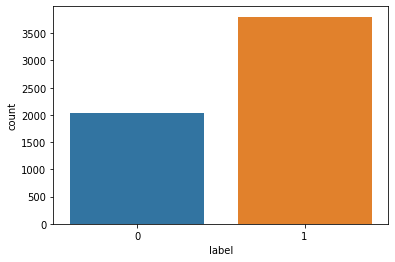

In [44]:
sns.countplot(df_raw.label);

## Nina und Mirko

In [45]:
def cleaning(x, check_num=False):
    """Checking a dataframe column:
    - unique values
    - numbers as strings
    - Missing values"""

    print(f'Amount of unique values: {x.nunique()}')
    if x.nunique() < 20:
        print(f'Unique Values: {x.unique()}')
        print(f'Value counts: {x.value_counts()}\n')
    else:
        print('More than 20 unique values. No printing of details.\n')
    
    if check_num==True and x.dtype=='object':
        errors = []
        for i in x.index:
            try:
                float(x.loc[i])
            except:
                errors.append([i, x.loc[i]])
        if len(errors) > 0:
            print("""Replace the non numeric entries by numeric entries or NaN. Restart the cleaning function, after replacement.""")
            print(errors, '\n')
    
    print(f'Missing in {x.name}: {round(x.isnull().sum()/len(x)*100,2)}%')
    print(f'Null-Values: {x.isnull().sum()}\n')

def replacement(x, nan_repl):
    """Getting a column from a dataframe with numbers as string. Replace strings with NaN
    and replace the NaN-values with median or mean (nan_repl)"""
    x = pd.to_numeric(x, errors='coerce')
    
    if nan_repl=='median':
        x.fillna(x.median(), inplace=True)
    if nan_repl=='mean':
        x.fillna(x.mean(), inplace=True)
        
    cleaning(x, True)
    return x

In [46]:
df_raw.head()

,label,hadm_id,icustay_id,SUBJECT_ID,gender,sub_age,numb_diagn,last_careunit,los,tracheo,...,SaO2,blood_pr,breath_min_vol,hr,lactic_acid,leuko,mean_insp_pressure,resp_rat,temp,tidal_vol
0,1,100016,217590,68591,M,56.0,11,MICU,6.1731,1,...,100,88.000000,6.2,91.0,NaN,10.7,6.0,18.0,NaN,653.0
1,1,100017,258320,16229,M,28.0,8,MICU,0.6924,0,...,100,91.333298,NaN,67.0,1.1,9.3,6.4,20.0,37.833302,430.0
2,1,100035,245719,48539,M,37.0,26,MICU,10.5061,0,...,95,138.000000,6.5,81.0,1,17.2,6.0,16.0,37.900000,151.0
3,1,100063,241782,69282,M,46.0,11,MICU,1.6501,0,...,100,85.000000,7.6,76.0,NaN,8.4,1.0,18.0,NaN,441.0
4,1,100087,294404,42255,M,57.0,18,CCU,3.7287,0,...,97,105.000000,10.8,94.0,1.3,8.5,7.0,17.0,NaN,481.0


In [47]:
df_raw.shape

(5836, 28)

In [48]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   label               5836 non-null   int64  
 1   hadm_id             5836 non-null   int64  
 2   icustay_id          5836 non-null   int64  
 3   SUBJECT_ID          5836 non-null   int64  
 4   gender              5836 non-null   object 
 5   sub_age             5836 non-null   float64
 6   numb_diagn          5836 non-null   int64  
 7   last_careunit       5836 non-null   object 
 8   los                 5836 non-null   float64
 9   tracheo             5836 non-null   int64  
 10  Pa02                5702 non-null   object 
 11  base_excess         5702 non-null   object 
 12  creatinin           5831 non-null   object 
 13  hb                  5825 non-null   object 
 14  hct                 5827 non-null   float64
 15  pH                  5713 non-null   object 
 16  FiO2  

In [49]:
df_raw.iloc[:,0:10].head()

,label,hadm_id,icustay_id,SUBJECT_ID,gender,sub_age,numb_diagn,last_careunit,los,tracheo
0,1,100016,217590,68591,M,56.0,11,MICU,6.1731,1
1,1,100017,258320,16229,M,28.0,8,MICU,0.6924,0
2,1,100035,245719,48539,M,37.0,26,MICU,10.5061,0
3,1,100063,241782,69282,M,46.0,11,MICU,1.6501,0
4,1,100087,294404,42255,M,57.0,18,CCU,3.7287,0


In [50]:
df_raw.isnull().sum()

label                    0
hadm_id                  0
icustay_id               0
SUBJECT_ID               0
gender                   0
sub_age                  0
numb_diagn               0
last_careunit            0
los                      0
tracheo                  0
Pa02                   134
base_excess            134
creatinin                5
hb                      11
hct                      9
pH                     123
FiO2                    51
PEEP                    78
SaO2                    17
blood_pr                15
breath_min_vol        3038
hr                       8
lactic_acid           1274
leuko                  300
mean_insp_pressure     154
resp_rat                12
temp                  2465
tidal_vol               74
dtype: int64

In [51]:
df_raw.iloc[:,0:10].isnull().any(axis=1).sum()

0

No missing values in the first 10 columns.

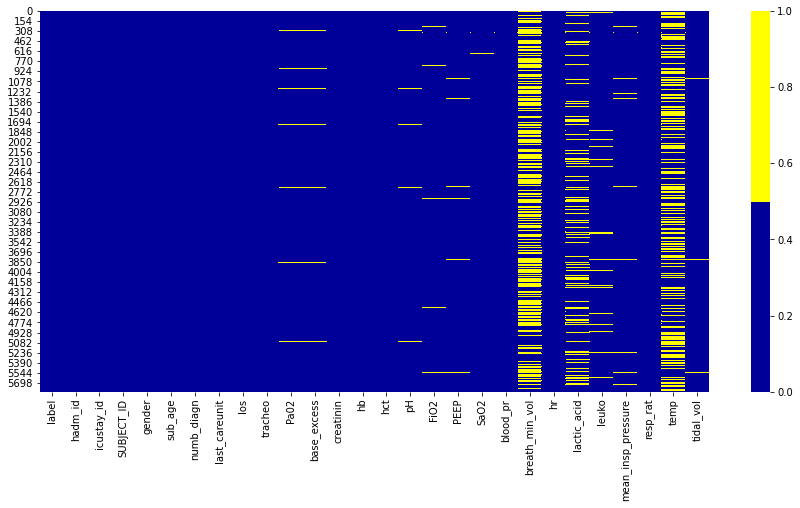

In [52]:
plt.figure(figsize=(15,7))
cols = df_raw.columns # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df_raw[cols].isnull(), cmap=sns.color_palette(colours));

## Gender

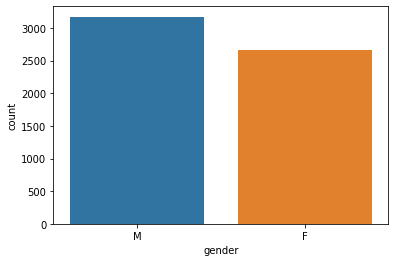

In [53]:
sns.countplot(df_raw.gender);

In [54]:
df_gender = df_raw.icustay_id.groupby(df_raw.gender).count()
df_gender['perc'] = df_gender / df_gender.sum()
df_gender

gender
F                                                    2664
M                                                    3172
perc    gender
F    0.456477
M    0.543523
Name: icust...
Name: icustay_id, dtype: object

There are slightly less women compared to men in the dataset. 

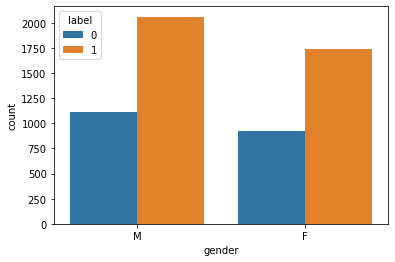

In [55]:
sns.countplot(df_raw.gender, hue=df_raw.label);

Gender is equally distributed between the label. Since there are no missing values, there is no need for further data cleaning.

## Age

In [56]:
cleaning(df_raw.sub_age, True)

Amount of unique values: 74
More than 20 unique values. No printing of details.

Missing in sub_age: 0.0%
Null-Values: 0



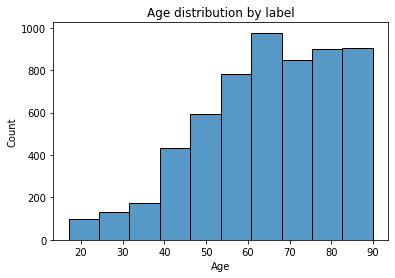

In [57]:
sns.histplot(df_raw.sub_age, bins=10)
plt.title('Age distribution by label')
plt.xlabel('Age');

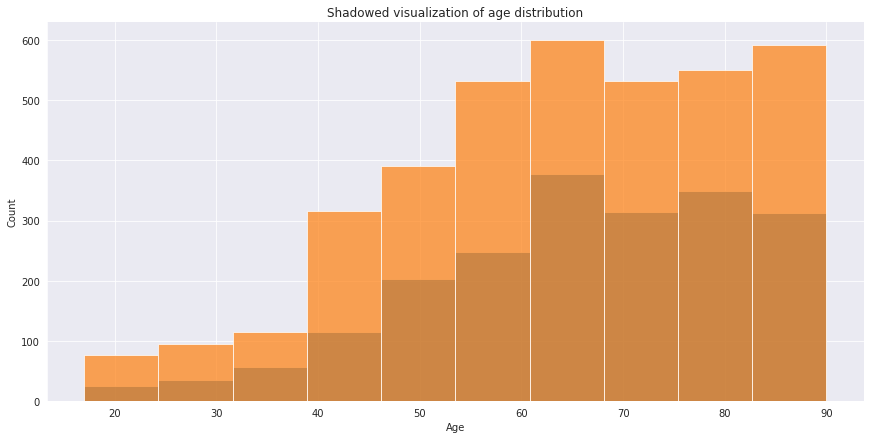

In [58]:
#sns.color_palette("vlag", as_cmap=True)
sns.set_style('darkgrid')
g = sns.FacetGrid(df_raw,hue="label",height=6,aspect=2)
g = g.map(plt.hist,'sub_age',bins=10,alpha=0.7)
plt.title('Shadowed visualization of age distribution')
plt.xlabel('Age')
plt.ylabel('Count');

This plot shows two histograms layered on top of each other. As there are more succeeded extubations, the bars of the histogram reach higher.

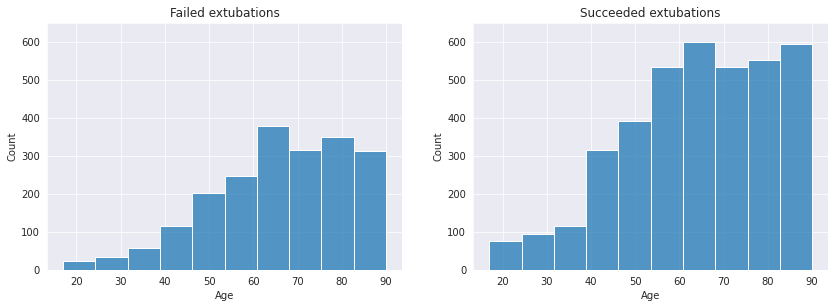

In [59]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.histplot(df_raw[df_raw.label==0].sub_age, bins=10)
ax1.set_ylim(0,650)
plt.xlabel('Age')
plt.title('Failed extubations')

ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.histplot(df_raw[df_raw.label==1].sub_age, bins=10)
ax2.set_ylim(0,650)
plt.xlabel('Age')
plt.title('Succeeded extubations');

This visualizations allows a glance at the age distribution of the the two label groups (failed and succeeded extubations) in seperate plots. 

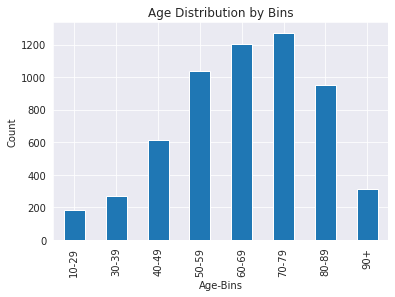

In [60]:
# Create bins to have another view at the age distribution

x_names = ['10-29','30-39','40-49','50-59','60-69','70-79','80-89','90+']
bins = [10, 30, 40, 50, 60, 70, 80, 90, 100]
cat = pd.cut(df_raw.sub_age, bins, right=False, labels=x_names)

df1 = df_raw.groupby(pd.cut(df_raw['sub_age'], 
                            bins=bins, right=False,labels=x_names)).sub_age.count()
df1.plot(kind='bar')
plt.title('Age Distribution by Bins')
plt.ylabel('Count')
plt.xlabel('Age-Bins');

Age is normally distributed across the dataset. 

In [61]:
# Seperate bins by label 
df_f = df_raw[df_raw.label == 0].groupby(pd.cut(df_raw[df_raw.label == 0]['sub_age'], bins=bins, right=False,labels=x_names)).sub_age.count()
df_s = df_raw[df_raw.label == 1].groupby(pd.cut(df_raw[df_raw.label == 1]['sub_age'], bins=bins, right=False,labels=x_names)).sub_age.count()
print(df_f)
print(df_s)


sub_age
10-29     48
30-39     82
40-49    173
50-59    341
60-69    456
70-79    474
80-89    355
90+      104
Name: sub_age, dtype: int64
sub_age
10-29    134
30-39    187
40-49    438
50-59    697
60-69    748
70-79    799
80-89    594
90+      206
Name: sub_age, dtype: int64


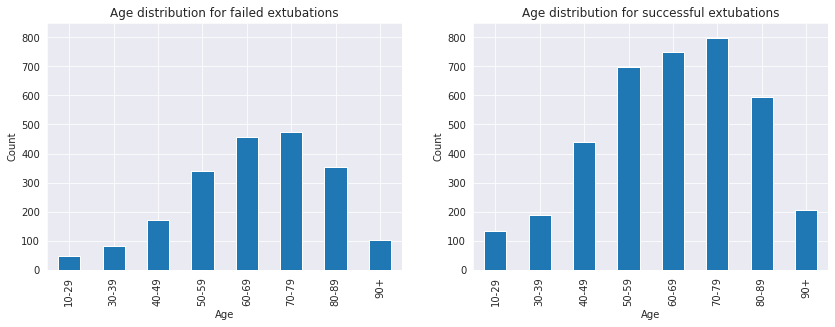

In [62]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2, 2, 1)
ax1 = df_f.plot(kind='bar')
ax1.set_ylim(0,850)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution for failed extubations')

ax2 = fig.add_subplot(2, 2, 2)
ax2 = df_s.plot(kind='bar')
ax2.set_ylim(0,850)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution for successful extubations');

No obvious differences of the age distribution between failed and succesful extubations in this dataset. 

# Number of Diagnosis 

In [63]:
f'Maximum number of diagnosis per patient: {(df_raw.numb_diagn.max())}'

'Maximum number of diagnosis per patient: 39'

In [64]:
f'Minimum number of diagnosis per patient: {(df_raw.numb_diagn.min())}'

'Minimum number of diagnosis per patient: 2'

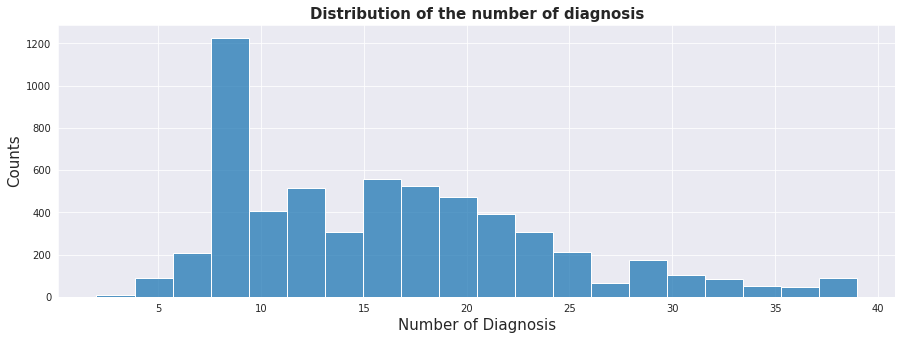

In [65]:
plt.figure(figsize=(15,5))
ax = sns.histplot(df_raw.numb_diagn, bins=20)
ax.set_title("Distribution of the number of diagnosis", fontsize=15, fontweight="bold")
ax.set_ylabel('Counts', fontsize=15)
ax.set_xlabel('Number of Diagnosis', fontsize=15);

It appears that a certain number of diagnosis is very common. Let's have a look what number of diagnosis it is. 

In [66]:
df_raw.numb_diagn.value_counts()[:5].sort_values(ascending=False)

9     1038
14     309
16     281
15     278
17     270
Name: numb_diagn, dtype: int64

In [67]:
df_raw.numb_diagn.value_counts().max()

1038

In [68]:
f'{round(df_raw.numb_diagn.value_counts().max()/len(df_raw)*100,2)}% of the patients have 9 diagnosis.'

'17.79% of the patients have 9 diagnosis.'

An 1038 patients in this dataset have 9 diagnosis. That makes 17% of the entire patients in the dataset. 

# Last Careunit 
 
The last careunit contains the last ICU type in which the patient was cared for.
* MICU: Medical Intensive Care Unit
* CCU: Coronary Care Unit
* SICU: Surgical Intensive Care Unit
* TSICU: Trauma Surgical Intensive Care Unit
* CSRU: Stroke Receiving Unit 

In [69]:
cleaning(df_raw.last_careunit)

Amount of unique values: 5
Unique Values: ['MICU' 'CCU' 'SICU' 'TSICU' 'CSRU']
Value counts: MICU     3628
SICU      852
CCU       620
TSICU     437
CSRU      299
Name: last_careunit, dtype: int64

Missing in last_careunit: 0.0%
Null-Values: 0



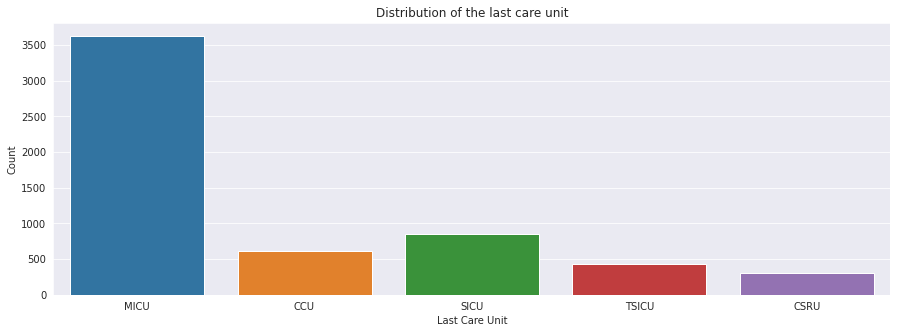

In [70]:
plt.figure(figsize=(15,5))
sns.countplot(df_raw.last_careunit)
plt.xlabel('Last Care Unit')
plt.ylabel('Count')
plt.title('Distribution of the last care unit');

In [71]:
print(f'{round(df_raw.last_careunit.value_counts().max()/len(df_raw)*100,2)}% of the patients were last treated in the Medical Intensive Care Unit.')

62.17% of the patients were last treated in the Medical Intensive Care Unit.


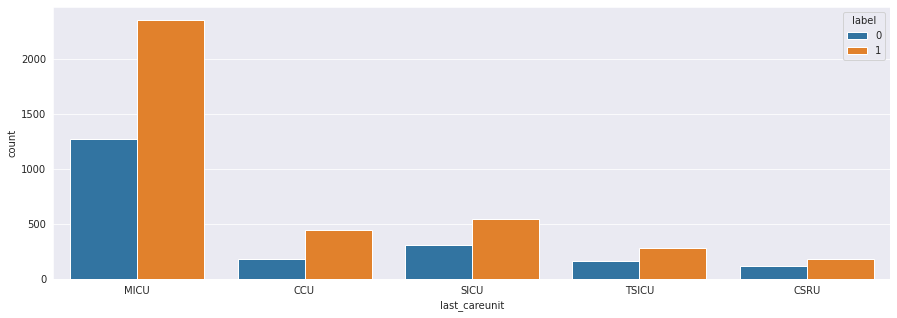

In [72]:
plt.figure(figsize=(15,5))
plt.legend(['Failed', 'Success'])
sns.countplot(df_raw.last_careunit, hue=df_raw.label);


Each ICU unit contains succeeded and failed extubations. In line with the overall distribution of succeeded and failed extubations, there are more succeeded extubations than failed extubations in each unit. 

# Length of stay

In [73]:
cleaning(df_raw.los, True)

Amount of unique values: 5740
More than 20 unique values. No printing of details.

Missing in los: 0.0%
Null-Values: 0



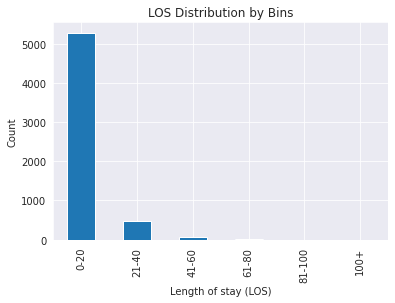

In [74]:
# Create bins to have another view at the length of stay

x_names = ['0-20','21-40','41-60','61-80','81-100','100+']
bins = [0, 21, 41, 61, 81, 101, 120]
cat = pd.cut(df_raw.los, bins, right=False, labels=x_names)

df1 = df_raw.groupby(pd.cut(df_raw['los'], 
                            bins=bins, right=False,labels=x_names)).los.count()
df1.plot(kind='bar')
plt.title('LOS Distribution by Bins')
plt.ylabel('Count')
plt.xlabel('Length of stay (LOS)');

In [75]:
df1

los
0-20      5283
21-40      469
41-60       76
61-80        6
81-100       1
100+         1
Name: los, dtype: int64

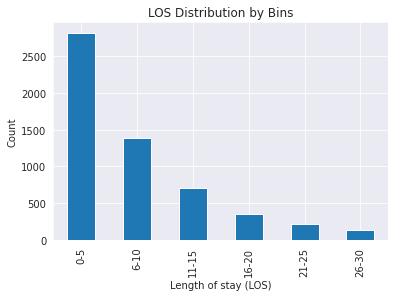

In [76]:
# Create bins to have another view at the length of stay less than 30 days LOS

x_names = ['0-5','6-10','11-15','16-20','21-25','26-30']
bins = [0, 6, 11, 16, 21, 26, 31]
cat = pd.cut(df_raw.los, bins, right=False, labels=x_names)

df1 = df_raw.groupby(pd.cut(df_raw['los'], 
                            bins=bins, right=False,labels=x_names)).los.count()
df1.plot(kind='bar')
plt.title('LOS Distribution by Bins')
plt.ylabel('Count')
plt.xlabel('Length of stay (LOS)');

# Tracheo

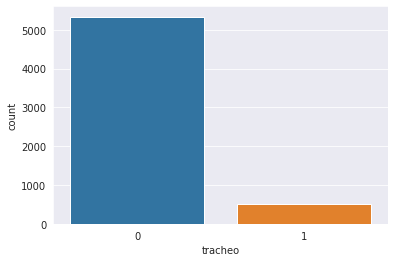

In [77]:
sns.countplot(df_raw.tracheo);

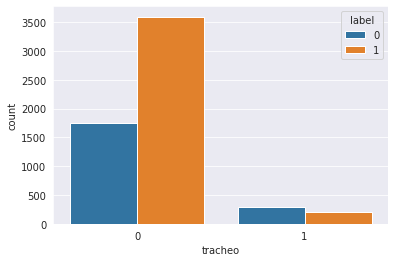

In [78]:
sns.countplot(df_raw.tracheo, hue=df_raw.label);

# PaO<sub>2</sub>: Partial Pressure of Oxygen

In [79]:
cleaning(df_raw.Pa02, True)

Amount of unique values: 369
More than 20 unique values. No printing of details.

Replace the non numeric entries by numeric entries or NaN. Restart the cleaning function, after replacement.
[[1764, 'DISREGARD PREVIOUS RESULT OF 156'], [2252, 'DISREGARD RESULTS']] 

Missing in Pa02: 2.3%
Null-Values: 134



In [80]:
df_raw.Pa02 = replacement(df_raw.Pa02, 'median')

Amount of unique values: 367
More than 20 unique values. No printing of details.

Missing in Pa02: 0.0%
Null-Values: 0



In [81]:
df_raw.Pa02.describe()

count    5836.000000
mean      120.299863
std        63.004701
min        16.000000
25%        84.000000
50%       107.000000
75%       141.000000
max       630.000000
Name: Pa02, dtype: float64

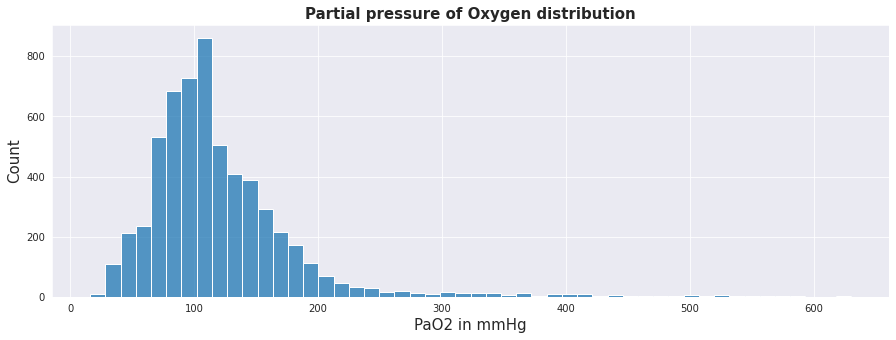

In [82]:
plt.figure(figsize=(15,5))
ax = sns.histplot(df_raw.Pa02, bins=50)
ax.set_title("Partial pressure of Oxygen distribution", fontsize=15, fontweight="bold")
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('PaO2 in mmHg', fontsize=15);

How many values are higher then 300 mm Hg?

In [83]:
len(df_raw[df_raw.Pa02 > 300])

139

The normal value for the partial pressure of arterial oxygen (PaO<sub>2</sub>) irrespective of age is greater than 80 mmHg.
Partial pressure of oxygen (PaO<sub>2</sub>) is considered to be moderate for levels ranging between 120 and 200 mmHg, 
and severe if PaO<sub>2</sub> exceeds 200 mmHg.   
 Values between 300 and 500 represent mild oxygenating inefficiency; values between 200 and 300 represent moderate lung inefficiency; 
 and values below 200 represent severe venous admixture 

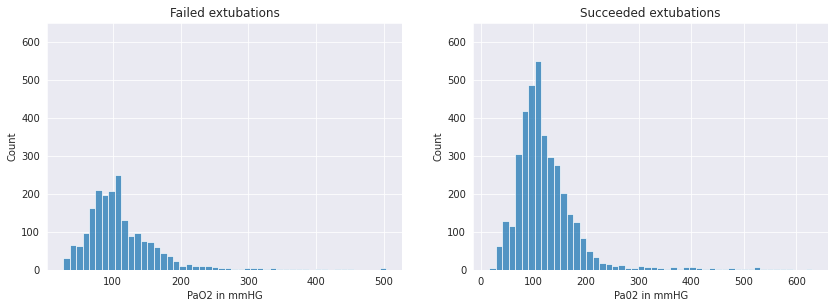

In [84]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.histplot(df_raw[df_raw.label==0].Pa02, bins=50)
ax1.set_ylim(0,650)
plt.xlabel('PaO2 in mmHG')
plt.title('Failed extubations')

ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.histplot(df_raw[df_raw.label==1].Pa02, bins=50)
ax2.set_ylim(0,650)
plt.xlabel('Pa02 in mmHG')
plt.title('Succeeded extubations');

# Base Excess

In [85]:
cleaning(df_raw.base_excess, True)

Amount of unique values: 54
More than 20 unique values. No printing of details.

Replace the non numeric entries by numeric entries or NaN. Restart the cleaning function, after replacement.
[[1764, 'DISREGARD PREVIOUS RESULT OF 3'], [2252, 'DISREGARD RESULTS'], [4733, '-']] 

Missing in base_excess: 2.3%
Null-Values: 134



In [86]:
df_raw.base_excess = replacement(df_raw.base_excess, 'median')

Amount of unique values: 51
More than 20 unique values. No printing of details.

Missing in base_excess: 0.0%
Null-Values: 0



In [87]:
df_raw.base_excess.unique()

array([  2.,   4.,  10.,   5.,   6.,  13.,   0.,  -2.,  19.,   1.,   3.,
         8.,  -3.,  -8.,  -6.,  12.,  -9.,  -1.,  -5.,  11.,  -4.,   9.,
        14.,   7., -11.,  22.,  17.,  -7., -14.,  18.,  15., -13., -10.,
       -18., -21.,  21., -12.,  16., -15.,  20., -16.,  27., -19., -17.,
       -20.,  25.,  26.,  24.,  28., -25., -22.])

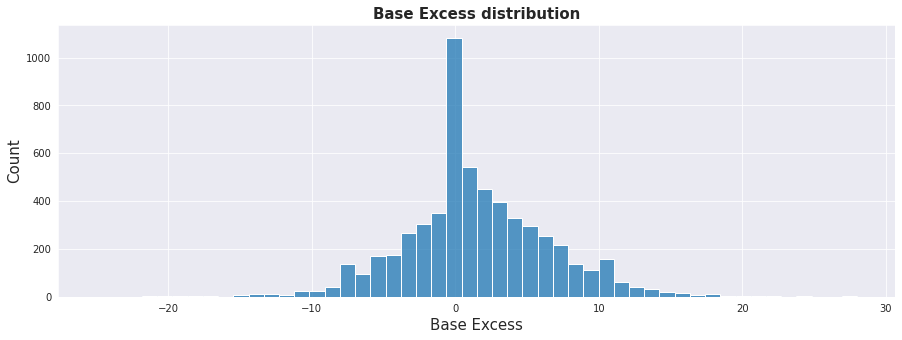

In [88]:
plt.figure(figsize=(15,5))
ax = sns.histplot(df_raw.base_excess, bins=50)
ax.set_title("Base Excess distribution", fontsize=15, fontweight="bold")
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Base Excess', fontsize=15);

In [89]:
df_raw.base_excess.value_counts()[:5].sort_values(ascending=False)

 0.0    1082
 1.0     544
 2.0     451
 3.0     396
-1.0     350
 4.0     328
-2.0     305
 5.0     295
Name: base_excess, dtype: int64

# Creatinin

In [90]:
cleaning(df_raw.creatinin, True)

Amount of unique values: 113
More than 20 unique values. No printing of details.

Replace the non numeric entries by numeric entries or NaN. Restart the cleaning function, after replacement.
[[1048, 'LESS THAN 0.5']] 

Missing in creatinin: 0.09%
Null-Values: 5



In [91]:
df_raw[df_raw.creatinin == 'LESS THAN 0.5']

,label,hadm_id,icustay_id,SUBJECT_ID,gender,sub_age,numb_diagn,last_careunit,los,tracheo,...,SaO2,blood_pr,breath_min_vol,hr,lactic_acid,leuko,mean_insp_pressure,resp_rat,temp,tidal_vol
1048,1,118261,288468,19262,M,31.0,9,SICU,16.3515,0,...,100,57.0,NaN,74.0,1.4,10.3,18.0,23.0,34.722198,500.0


In [92]:
df_raw.creatinin.replace('LESS THAN 0.5', '0.3', inplace=True)
df_raw[df_raw.creatinin == 'LESS THAN 0.5']

,label,hadm_id,icustay_id,SUBJECT_ID,gender,sub_age,numb_diagn,last_careunit,los,tracheo,...,SaO2,blood_pr,breath_min_vol,hr,lactic_acid,leuko,mean_insp_pressure,resp_rat,temp,tidal_vol


In [93]:
df_raw.creatinin = replacement(df_raw.creatinin, 'median')

Amount of unique values: 112
More than 20 unique values. No printing of details.

Missing in creatinin: 0.0%
Null-Values: 0



# Hemoglobin 

In [94]:
cleaning(df_raw.hb, True)

Amount of unique values: 117
More than 20 unique values. No printing of details.

Replace the non numeric entries by numeric entries or NaN. Restart the cleaning function, after replacement.
[[5285, 'UNABLE TO REPORT']] 

Missing in hb: 0.19%
Null-Values: 11



In [95]:
df_raw.hb = replacement(df_raw.hb, 'median')

Amount of unique values: 116
More than 20 unique values. No printing of details.

Missing in hb: 0.0%
Null-Values: 0



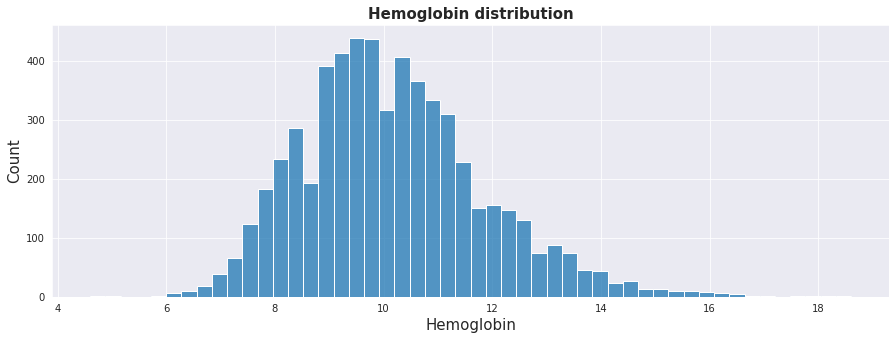

In [96]:
plt.figure(figsize=(15,5))
ax = sns.histplot(df_raw.hb, bins=50)
ax.set_title("Hemoglobin distribution", fontsize=15, fontweight="bold")
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Hemoglobin', fontsize=15);

# pH Value

In [97]:
cleaning(df_raw.pH, True)

Amount of unique values: 63
More than 20 unique values. No printing of details.

Replace the non numeric entries by numeric entries or NaN. Restart the cleaning function, after replacement.
[[1764, 'DISREGARD PREVIOUS RESULT OF 7.55.'], [1859, 'GREATER THAN 7.55'], [2252, 'DISREGARD RESULTS']] 

Missing in pH: 2.11%
Null-Values: 123



In [98]:
print(df_raw[df_raw.pH == 'DISREGARD PREVIOUS RESULT OF 7.55.'].pH.count())
print(df_raw[df_raw.pH == 'GREATER THAN 7.55'].pH.count())
print(df_raw[df_raw.pH == 'DISREGARD RESULTS'].pH.count())

1
1
1


In [99]:
df_raw.pH.replace('GREATER THAN 7.55', '7.55', inplace=True)
df_raw[df_raw.pH == 'GREATER THAN 7.55']

,label,hadm_id,icustay_id,SUBJECT_ID,gender,sub_age,numb_diagn,last_careunit,los,tracheo,...,SaO2,blood_pr,breath_min_vol,hr,lactic_acid,leuko,mean_insp_pressure,resp_rat,temp,tidal_vol


In [100]:
df_raw.pH = replacement(df_raw.pH, 'median')

Amount of unique values: 60
More than 20 unique values. No printing of details.

Missing in pH: 0.0%
Null-Values: 0



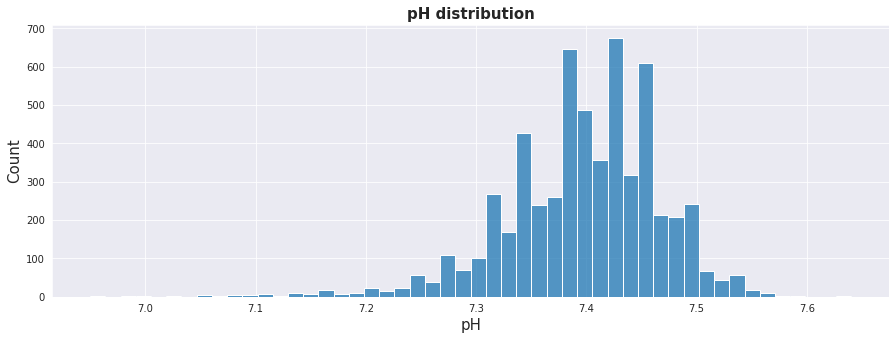

In [101]:
plt.figure(figsize=(15,5))
ax = sns.histplot(df_raw.pH, bins=50)
ax.set_title("pH distribution", fontsize=15, fontweight="bold")
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('pH', fontsize=15);

# Hematocrit

In [102]:
cleaning(df_raw.hct, True)

Amount of unique values: 301
More than 20 unique values. No printing of details.

Missing in hct: 0.15%
Null-Values: 9



In [103]:
df_raw.hct = replacement(df_raw.hct, 'median')

Amount of unique values: 301
More than 20 unique values. No printing of details.

Missing in hct: 0.0%
Null-Values: 0



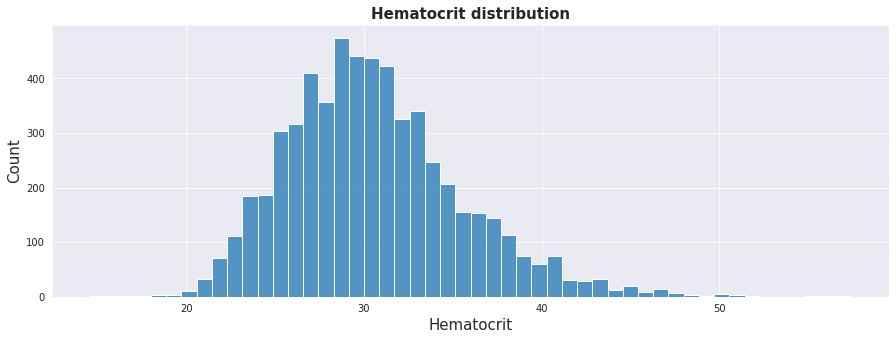

In [104]:
plt.figure(figsize=(15,5))
ax = sns.histplot(df_raw.hct, bins=50)
ax.set_title("Hematocrit distribution", fontsize=15, fontweight="bold")
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Hematocrit', fontsize=15);

# Heart Rate

In [105]:
cleaning(df_raw.hr, True)

Amount of unique values: 118
More than 20 unique values. No printing of details.

Missing in hr: 0.14%
Null-Values: 8



In [106]:
df_raw.hr= df_raw.hr.astype(float)

In [107]:
df_raw.hr.describe()

count    5828.000000
mean       87.968257
std        17.772909
min         0.000000
25%        75.000000
50%        87.000000
75%        99.250000
max       166.000000
Name: hr, dtype: float64

In [108]:
len(df_raw[df_raw.hr == 0])

6

In [109]:
df_raw.hr = df_raw.hr.replace(to_replace= 0, value= np.nan)

In [110]:
df_raw.hr = replacement(df_raw.hr, 'median')

Amount of unique values: 117
More than 20 unique values. No printing of details.

Missing in hr: 0.0%
Null-Values: 0



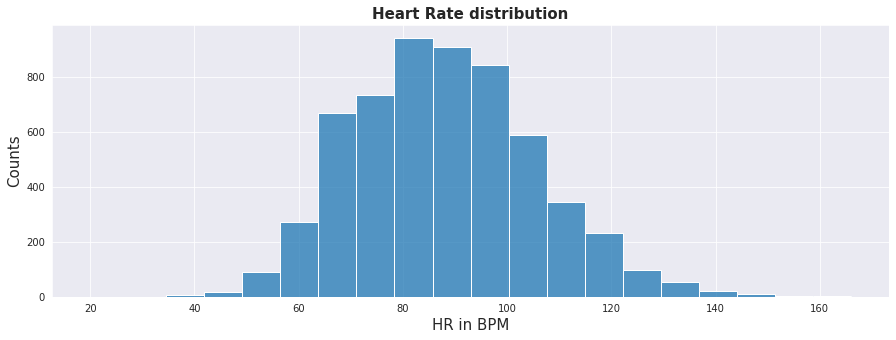

In [111]:
plt.figure(figsize=(15,5))
ax = sns.histplot(df_raw.hr, bins=20)
ax.set_title("Heart Rate distribution", fontsize=15, fontweight="bold")
ax.set_ylabel('Counts', fontsize=15)
ax.set_xlabel('HR in BPM', fontsize=15);

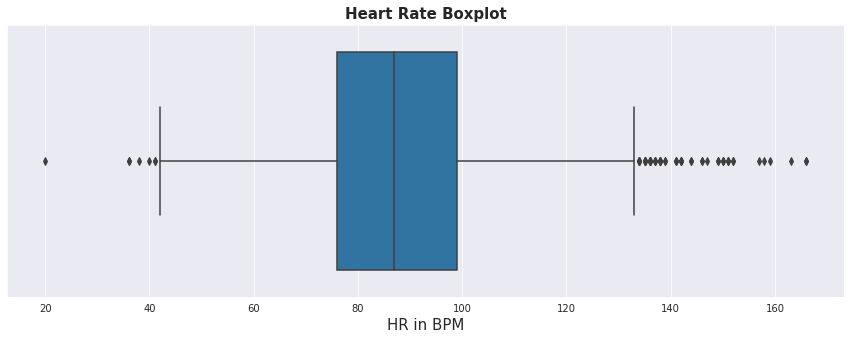

In [112]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(df_raw.hr)
ax.set_title("Heart Rate Boxplot", fontsize=15, fontweight="bold")
ax.set_xlabel('HR in BPM', fontsize=15);

Most healthy adults have a resting heart rate between 60 and 100bpm.  

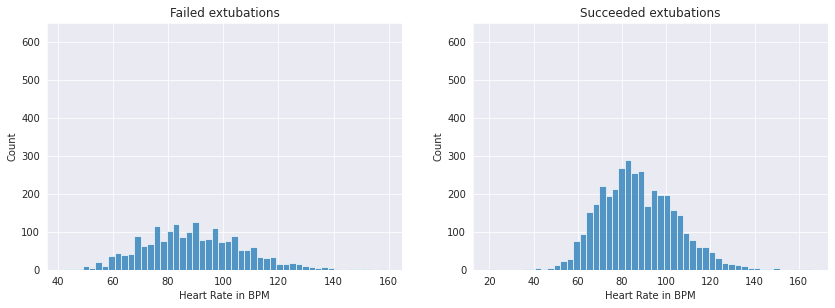

In [113]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.histplot(df_raw[df_raw.label==0].hr, bins=50)
ax1.set_ylim(0,650)
plt.xlabel('Heart Rate in BPM')
plt.title('Failed extubations')

ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.histplot(df_raw[df_raw.label==1].hr, bins=50)
ax2.set_ylim(0,650)
plt.xlabel('Heart Rate in BPM')
plt.title('Succeeded extubations');

# Blood Pressure

In [114]:
cleaning(df_raw.blood_pr, True)

Amount of unique values: 267
More than 20 unique values. No printing of details.

Missing in blood_pr: 0.26%
Null-Values: 15



In [115]:
df_raw.blood_pr.describe()

count    5821.000000
mean       83.536276
std        18.704412
min         0.000000
25%        71.000000
50%        82.000000
75%        94.000000
max       277.000000
Name: blood_pr, dtype: float64

In [116]:
df_raw.blood_pr= df_raw.blood_pr.astype(float)

In [117]:
len(df_raw[df_raw.blood_pr == 0])

2

In [118]:
len(df_raw[df_raw.blood_pr == 3])

1

In [119]:
df_raw.blood_pr = df_raw.blood_pr.replace(to_replace= 0, value= np.nan)

In [120]:
df_raw.blood_pr = df_raw.blood_pr.replace(to_replace= 3, value= np.nan)

In [121]:
df_raw.blood_pr = replacement(df_raw.blood_pr, 'median')

Amount of unique values: 265
More than 20 unique values. No printing of details.

Missing in blood_pr: 0.0%
Null-Values: 0



''

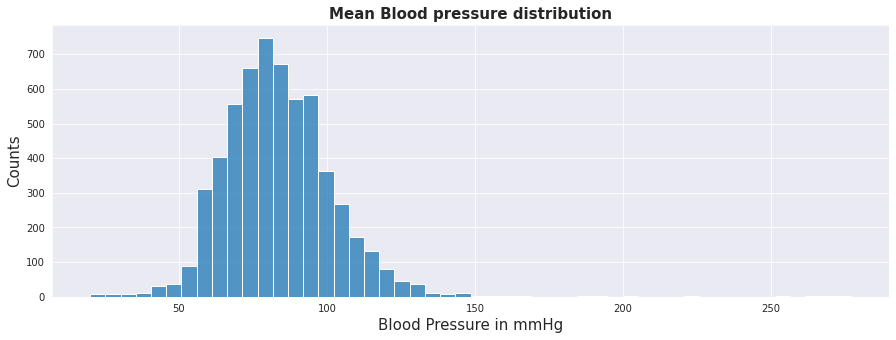

In [122]:
plt.figure(figsize=(15,5))
ax = sns.histplot(df_raw.blood_pr, bins=50)
ax.set_title("Mean Blood pressure distribution", fontsize=15, fontweight="bold")
ax.set_ylabel('Counts', fontsize=15)
ax.set_xlabel('Blood Pressure in mmHg', fontsize=15);
;

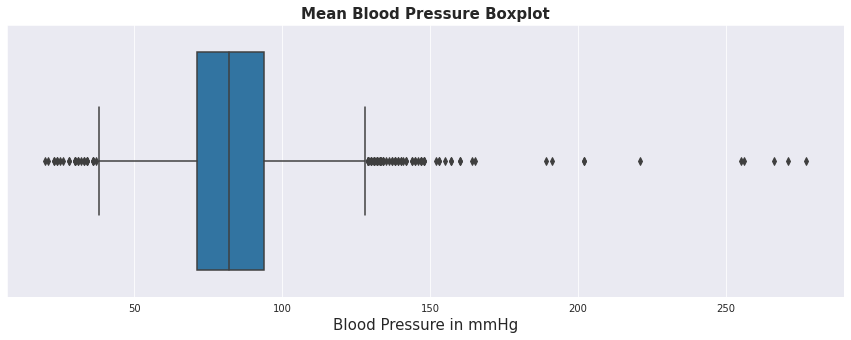

In [123]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(df_raw.blood_pr)
ax.set_title("Mean Blood Pressure Boxplot", fontsize=15, fontweight="bold")
ax.set_xlabel('Blood Pressure in mmHg', fontsize=15);

Doctors usually consider anything between 70 and 100 mmHg to be normal.

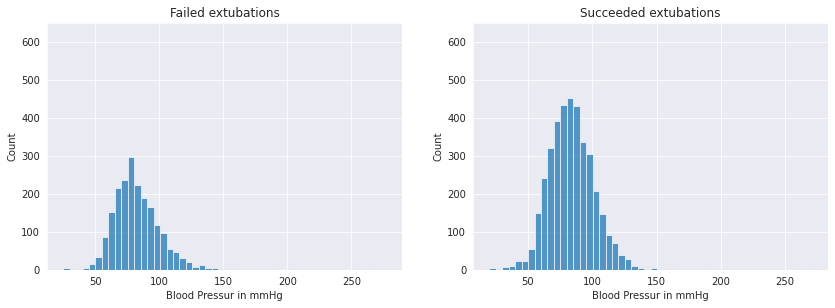

In [124]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.histplot(df_raw[df_raw.label==0].blood_pr, bins=50)
ax1.set_ylim(0,650)
plt.xlabel('Blood Pressur in mmHg')
plt.title('Failed extubations')

ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.histplot(df_raw[df_raw.label==1].blood_pr, bins=50)
ax2.set_ylim(0,650)
plt.xlabel('Blood Pressur in mmHg')
plt.title('Succeeded extubations');

# Temperature

In [125]:
cleaning(df_raw.temp, True)

Amount of unique values: 193
More than 20 unique values. No printing of details.

Missing in temp: 42.24%
Null-Values: 2465



In [126]:
f'Missing in temp: {round(df_raw.temp.isnull().sum()/len(df_raw)*100,2)}%'

'Missing in temp: 42.24%'

Unfortenately we have too many missing values in this column that makes it impossible to make accurate 
predictions. So we have decided to delete entirely this column.

In [127]:
df_raw.drop('temp', inplace=True, axis = 1)

In [128]:
'temp' in df_raw.columns

False

#  SaO<sub>2</sub>: Saturation of Oxygen

In [129]:
cleaning(df_raw.SaO2, True)

Amount of unique values: 68
More than 20 unique values. No printing of details.

Replace the non numeric entries by numeric entries or NaN. Restart the cleaning function, after replacement.
[[831, '99 99'], [1764, '100 100'], [3657, '90 90'], [4685, '98 98'], [4880, '97 97'], [5588, '97.0 97.0']] 

Missing in SaO2: 0.29%
Null-Values: 17



In [130]:
df_raw.SaO2 = df_raw.SaO2.astype(str)

In [131]:
df_raw.SaO2 = df_raw.SaO2.apply(lambda x: x.split(' ')[0] if ' ' in x else x)

In [132]:
cleaning(df_raw.SaO2, True)

Amount of unique values: 63
More than 20 unique values. No printing of details.

Missing in SaO2: 0.0%
Null-Values: 0



In [133]:
df_raw.SaO2 = replacement(df_raw.SaO2, 'median')

Amount of unique values: 44
More than 20 unique values. No printing of details.

Missing in SaO2: 0.0%
Null-Values: 0



In [134]:
len(df_raw[df_raw.SaO2<70])

21

This outliers are not plausible.  Because when SaO2 is lower than 70% the patient must be intubated.
 It must be that there are typos. We replace this values by the median.

In [135]:
a = list(df_raw[df_raw.SaO2<70].SaO2.unique())
for i in a:
    df_raw.SaO2 = df_raw.SaO2.replace(to_replace=  i, value= 98)

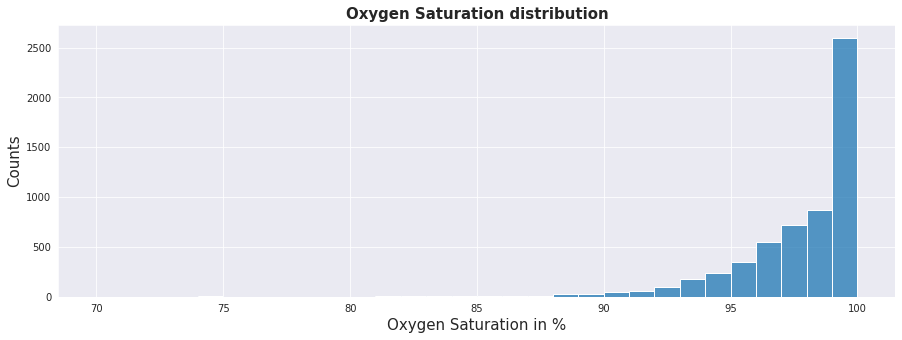

In [136]:
plt.figure(figsize=(15,5))
ax = sns.histplot(df_raw.SaO2, bins=30)
ax.set_title("Oxygen Saturation distribution", fontsize=15, fontweight="bold")
ax.set_ylabel('Counts', fontsize=15)
ax.set_xlabel('Oxygen Saturation in %', fontsize=15);

# Respiratory Rate

In [137]:
cleaning(df_raw.resp_rat, True)

Amount of unique values: 54
More than 20 unique values. No printing of details.

Missing in resp_rat: 0.21%
Null-Values: 12



In [138]:
df_raw.sort_values('resp_rat', ascending=False).resp_rat.unique()

array([69., 66., 60., 54., 52., 50., 49., 48., 45., 44., 43., 42., 41.,
       40., 39., 38., 37., 36., 35., 34., 33., 32., 31., 30., 29., 28.,
       27., 26., 25., 24., 23., 22., 21., 20., 19., 18., 17., 16., 15.,
       14., 13., 12., 11., 10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,
        1.,  0., nan])

In [139]:
df_raw.resp_rat= df_raw.resp_rat.astype(float)

In [140]:
len(df_raw[df_raw.resp_rat == 0])

26

In [141]:
df_raw.resp_rat = df_raw.resp_rat.replace(to_replace= 0, value= np.nan)

In [142]:
df_raw.resp_rat = replacement(df_raw.resp_rat, 'median')

Amount of unique values: 53
More than 20 unique values. No printing of details.

Missing in resp_rat: 0.0%
Null-Values: 0



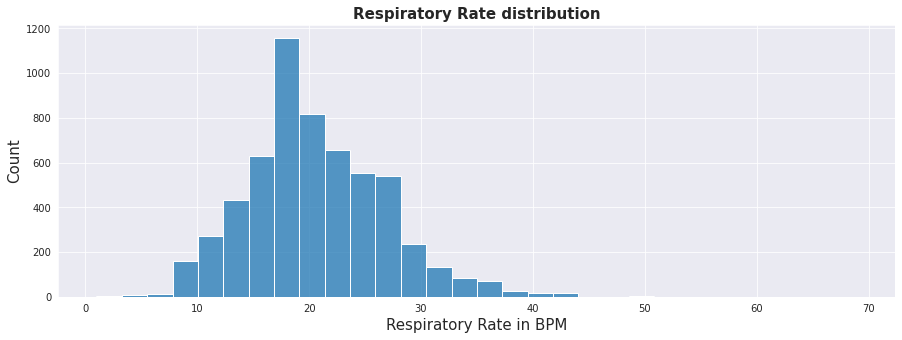

In [143]:
plt.figure(figsize=(15,5))
ax = sns.histplot(df_raw.resp_rat, bins=30)
ax.set_title("Respiratory Rate distribution", fontsize=15, fontweight="bold")
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Respiratory Rate in BPM', fontsize=15);

# Tidal Volume

In [144]:
cleaning(df_raw.tidal_vol, True)

Amount of unique values: 776
More than 20 unique values. No printing of details.

Missing in tidal_vol: 1.27%
Null-Values: 74



In [145]:
df_raw.tidal_vol= df_raw.tidal_vol.astype(float)

In [146]:
df_raw.tidal_vol.describe()

count    5762.000000
mean      473.302062
std       193.854958
min         0.000000
25%       372.000000
50%       460.000000
75%       560.000000
max      6000.000000
Name: tidal_vol, dtype: float64

In [147]:
len(df_raw[df_raw.tidal_vol > 2000])

2

In [148]:
len(df_raw[df_raw.tidal_vol == 0])

124

In [149]:
df_raw.tidal_vol = df_raw.tidal_vol.replace(to_replace= 0, value= np.nan)

In [150]:
df_raw.tidal_vol = df_raw.tidal_vol.replace(to_replace= 6000, value= np.nan)

In [151]:
df_raw.tidal_vol = df_raw.tidal_vol.replace(to_replace= 4775, value= np.nan)

In [152]:
df_raw.tidal_vol = replacement(df_raw.tidal_vol, 'median')

Amount of unique values: 773
More than 20 unique values. No printing of details.

Missing in tidal_vol: 0.0%
Null-Values: 0



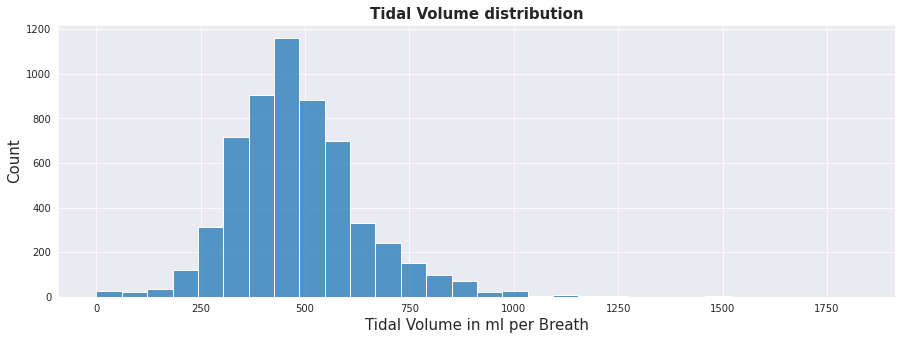

In [153]:
plt.figure(figsize=(15,5))
ax = sns.histplot(df_raw.tidal_vol, bins=30)
ax.set_title("Tidal Volume distribution", fontsize=15, fontweight="bold")
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Tidal Volume in ml per Breath', fontsize=15);

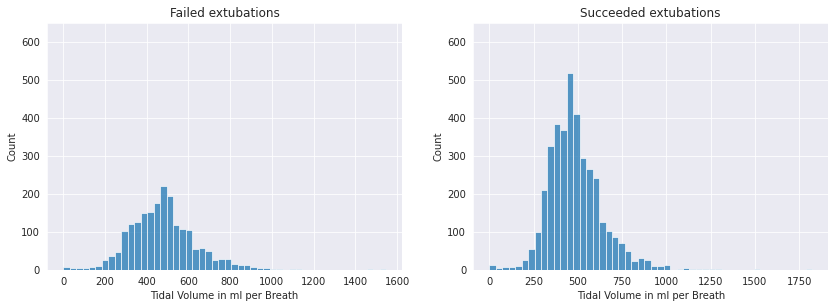

In [154]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.histplot(df_raw[df_raw.label==0].tidal_vol, bins=50)
ax1.set_ylim(0,650)
plt.xlabel('Tidal Volume in ml per Breath')
plt.title('Failed extubations')

ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.histplot(df_raw[df_raw.label==1].tidal_vol, bins=50)
ax2.set_ylim(0,650)
plt.xlabel('Tidal Volume in ml per Breath')
plt.title('Succeeded extubations');

# Breath-Minute-Volume

In [155]:
cleaning(df_raw.breath_min_vol, True)

Amount of unique values: 308
More than 20 unique values. No printing of details.

Missing in breath_min_vol: 52.06%
Null-Values: 3038



We have more than half missing values. Nevertheless we can engineer the Breath-Minute-Volume by
 multiplying the Tidal Volume by Respiratory Rate. We decided to calculate the Breath-Minute-Volume 
 for every Patient.

In [156]:
df_raw.eval('breath_minute_vol = resp_rat * tidal_vol / 1000', inplace=True)

In [157]:
df_raw.breath_minute_vol.unique()

array([11.754,  8.6  ,  2.416, ...,  9.128,  0.87 ,  6.509])

In [158]:
df_raw.columns

Index(['label', 'hadm_id', 'icustay_id', 'SUBJECT_ID', 'gender', 'sub_age',
       'numb_diagn', 'last_careunit', 'los', 'tracheo', 'Pa02', 'base_excess',
       'creatinin', 'hb', 'hct', 'pH', 'FiO2', 'PEEP', 'SaO2', 'blood_pr',
       'breath_min_vol', 'hr', 'lactic_acid', 'leuko', 'mean_insp_pressure',
       'resp_rat', 'tidal_vol', 'breath_minute_vol'],
      dtype='object')

In [159]:
df_raw[['breath_minute_vol','breath_min_vol']].describe()

,breath_minute_vol,breath_min_vol
count,5836.000000,2798.000000
mean,9.686569,9.525565
std,3.795865,14.952937
min,0.006660,0.000000
25%,7.200000,7.000000
50%,9.151000,8.800000
75%,11.550000,11.000000
max,40.590000,777.000000


In [160]:
df_raw.drop('breath_min_vol', inplace=True, axis=1)

In [161]:
cleaning(df_raw.breath_minute_vol, True)

Amount of unique values: 2747
More than 20 unique values. No printing of details.

Missing in breath_minute_vol: 0.0%
Null-Values: 0



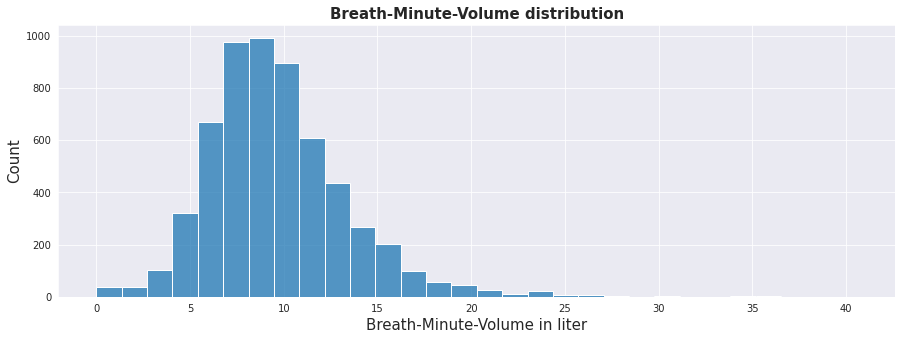

In [162]:
plt.figure(figsize=(15,5))
ax = sns.histplot(df_raw.breath_minute_vol, bins=30)
ax.set_title("Breath-Minute-Volume distribution", fontsize=15, fontweight="bold")
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Breath-Minute-Volume in liter', fontsize=15);

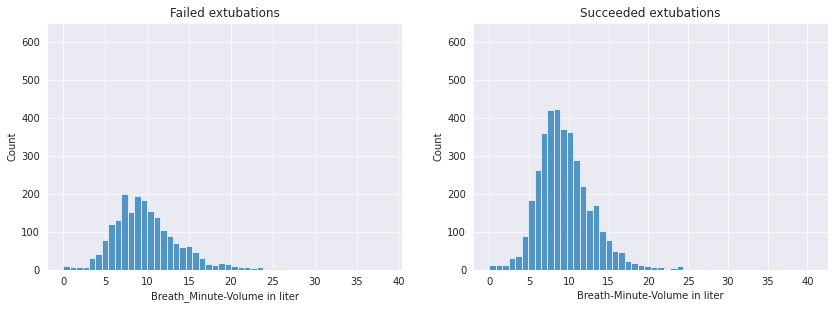

In [163]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.histplot(df_raw[df_raw.label==0].breath_minute_vol, bins=50)
ax1.set_ylim(0,650)
plt.xlabel('Breath_Minute-Volume in liter')
plt.title('Failed extubations')

ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.histplot(df_raw[df_raw.label==1].breath_minute_vol, bins=50)
ax2.set_ylim(0,650)
plt.xlabel('Breath-Minute-Volume in liter')
plt.title('Succeeded extubations');

# FiO<sub>2</sub> : Fraction of Inspired Oxygen

In [164]:
cleaning(df_raw.FiO2, True)

Amount of unique values: 51
More than 20 unique values. No printing of details.

Missing in FiO2: 0.87%
Null-Values: 51



In [165]:
df_raw.sort_values('FiO2', ascending=False).FiO2.unique()

array([100.        ,  96.        ,  95.        ,  90.        ,
        80.        ,  75.        ,  70.        ,  65.        ,
        60.        ,  55.        ,  51.        ,  50.        ,
        45.        ,  41.        ,  40.        ,  39.        ,
        36.        ,  35.        ,  32.        ,  31.        ,
        30.        ,  28.        ,  26.        ,  25.        ,
        24.        ,  21.        ,   3.        ,   1.        ,
         0.89999998,   0.80000001,   0.80000001,   0.75      ,
         0.69999999,   0.64999998,   0.60000002,   0.55000001,
         0.5       ,   0.44999999,   0.40099999,   0.40000001,
         0.4       ,   0.34999999,   0.34      ,   0.30000001,
         0.28      ,   0.27000001,   0.25999999,   0.25      ,
         0.23999999,   0.20999999,   0.        ,          nan])

The value is given in different units: 
percent or decimal number between 0 and 1.   
To make the values ​​comparable, the decimal numbers are multiplied by 100.

In [166]:
a = list(df_raw[df_raw.FiO2<= 1].FiO2.unique())
for i in a:
    df_raw.FiO2 = df_raw.FiO2.replace(to_replace=  i, value= i * 100)

In [167]:
df_raw.sort_values('FiO2', ascending=False).FiO2.unique()

array([100.        ,  96.        ,  95.        ,  90.        ,
        89.99999762,  80.00000119,  80.00000119,  80.        ,
        75.        ,  70.        ,  69.99999881,  65.        ,
        64.99999762,  60.00000238,  60.        ,  55.00000119,
        55.        ,  51.        ,  50.        ,  45.        ,
        44.99999881,  41.        ,  40.09999931,  40.0000006 ,
        40.        ,  39.        ,  36.        ,  35.        ,
        34.9999994 ,  34.00000036,  32.        ,  31.        ,
        30.00000119,  30.        ,  28.00000012,  28.        ,
        27.00000107,  26.        ,  25.99999905,  25.        ,
        24.        ,  23.99999946,  21.        ,  20.99999934,
         3.        ,   0.        ,          nan])

In [168]:
len(df_raw[df_raw.FiO2 == 0])

4

In [169]:
len(df_raw[df_raw.FiO2 == 3])

1

The values ​​0 and 3 make no medical sense, therefore they are treated as errors and set to nan

In [170]:
df_raw.FiO2 = df_raw.FiO2.replace(to_replace= 0, value= np.nan)
df_raw.FiO2 = df_raw.FiO2.replace(to_replace= 3, value= np.nan)

In [171]:
df_raw.FiO2 = replacement(df_raw.FiO2, 'median')

Amount of unique values: 44
More than 20 unique values. No printing of details.

Missing in FiO2: 0.0%
Null-Values: 0



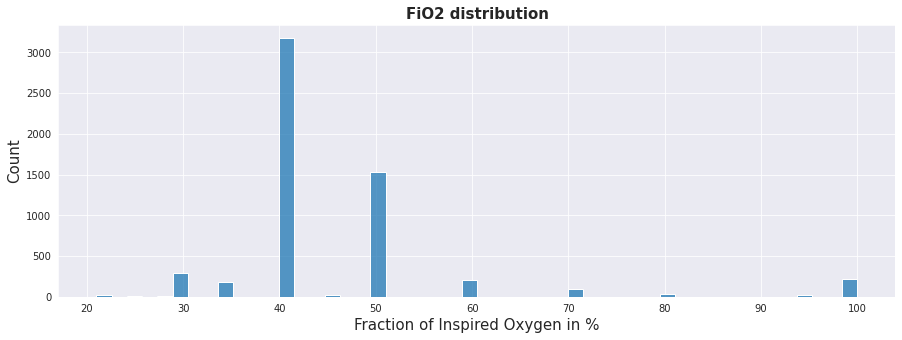

In [172]:
plt.figure(figsize=(15,5))
ax = sns.histplot(df_raw.FiO2, bins=50)
ax.set_title("FiO2 distribution", fontsize=15, fontweight="bold")
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Fraction of Inspired Oxygen in %', fontsize=15);

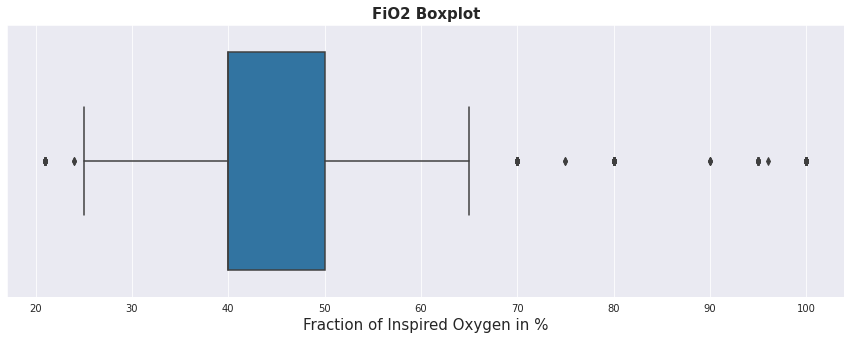

In [173]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(df_raw.FiO2)
ax.set_title("FiO2 Boxplot", fontsize=15, fontweight="bold")
ax.set_xlabel('Fraction of Inspired Oxygen in %', fontsize=15);

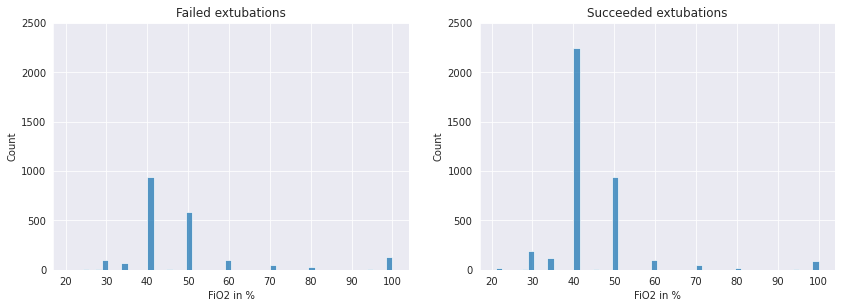

In [174]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.histplot(df_raw[df_raw.label==0].FiO2, bins=50)
ax1.set_ylim(0,2500)
plt.xlabel('FiO2 in %')
plt.title('Failed extubations')

ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.histplot(df_raw[df_raw.label==1].FiO2, bins=50)
ax2.set_ylim(0,2500)
plt.xlabel('FiO2 in %')
plt.title('Succeeded extubations');

# PEEP: Positive end-expiratory pressure

In [175]:
cleaning(df_raw.PEEP, True)

Amount of unique values: 30
More than 20 unique values. No printing of details.

Missing in PEEP: 1.34%
Null-Values: 78



In [176]:
df_raw.sort_values('PEEP', ascending=False).PEEP.unique()

array([24.        , 23.        , 22.        , 20.        , 18.        ,
       17.        , 16.        , 15.        , 14.        , 13.        ,
       12.5       , 12.30000019, 12.        , 10.        ,  8.        ,
        7.5999999 ,  7.5       ,  7.        ,  6.        ,  5.4000001 ,
        5.19999981,  5.0999999 ,  5.        ,  4.9000001 ,  4.69999981,
        4.5999999 ,  4.        ,  3.        ,  2.        ,  0.        ,
               nan])

In [177]:
len(df_raw[df_raw.PEEP == 0])

1147

In [178]:
df_raw.PEEP = replacement(df_raw.PEEP, 'median')

Amount of unique values: 30
More than 20 unique values. No printing of details.

Missing in PEEP: 0.0%
Null-Values: 0



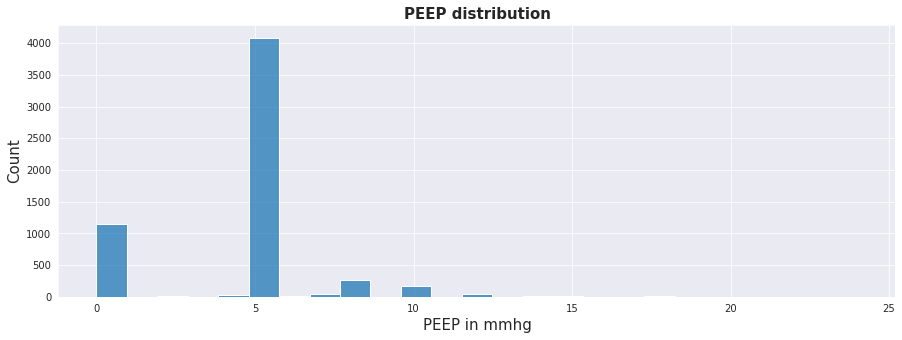

In [179]:
plt.figure(figsize=(15,5))
ax = sns.histplot(df_raw.PEEP, bins=25)
ax.set_title("PEEP distribution", fontsize=15, fontweight="bold")
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('PEEP in mmhg', fontsize=15);

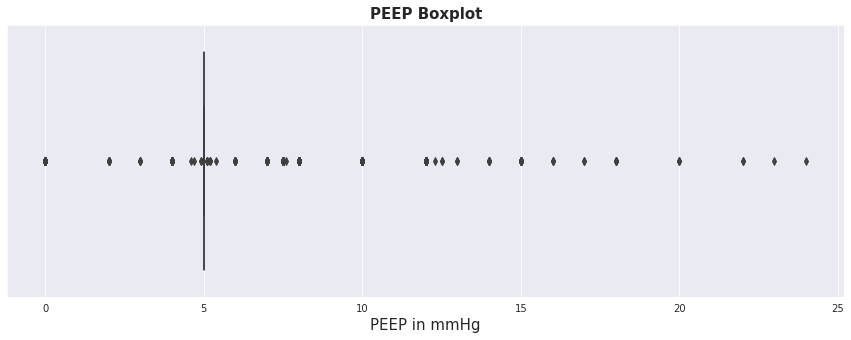

In [180]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(df_raw.PEEP)
ax.set_title("PEEP Boxplot", fontsize=15, fontweight="bold")
ax.set_xlabel('PEEP in mmHg', fontsize=15);

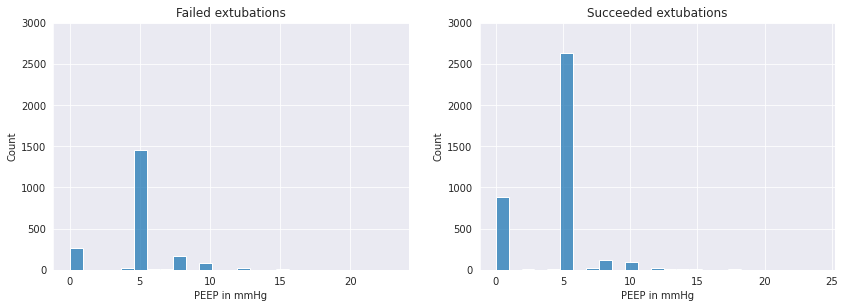

In [181]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.histplot(df_raw[df_raw.label==0].PEEP, bins=25)
ax1.set_ylim(0,3000)
plt.xlabel('PEEP in mmHg')
plt.title('Failed extubations')

ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.histplot(df_raw[df_raw.label==1].PEEP, bins=25)
ax2.set_ylim(0,3000)
plt.xlabel('PEEP in mmHg')
plt.title('Succeeded extubations');

# 

# Mean Inspiration pressure

In [182]:
cleaning(df_raw.mean_insp_pressure, True)

Amount of unique values: 149
More than 20 unique values. No printing of details.

Missing in mean_insp_pressure: 2.64%
Null-Values: 154



In [183]:
len(df_raw[df_raw.mean_insp_pressure == 0])

82

In [184]:
df_raw.mean_insp_pressure = replacement(df_raw.mean_insp_pressure, 'median')

Amount of unique values: 149
More than 20 unique values. No printing of details.

Missing in mean_insp_pressure: 0.0%
Null-Values: 0



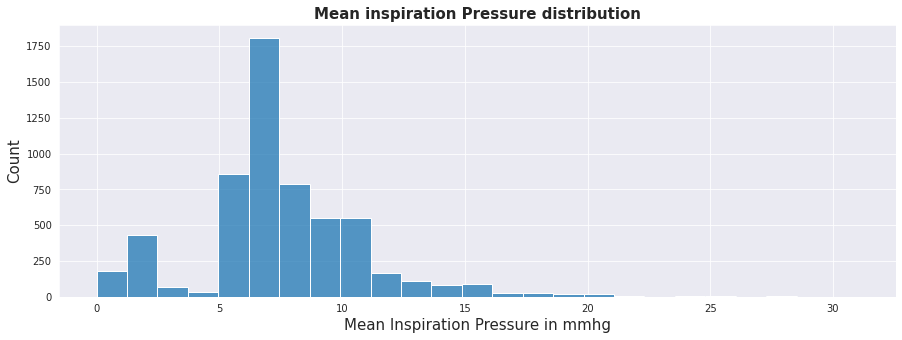

In [185]:
plt.figure(figsize=(15,5))
ax = sns.histplot(df_raw.mean_insp_pressure, bins=25)
ax.set_title("Mean inspiration Pressure distribution", fontsize=15, fontweight="bold")
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Mean Inspiration Pressure in mmhg', fontsize=15);

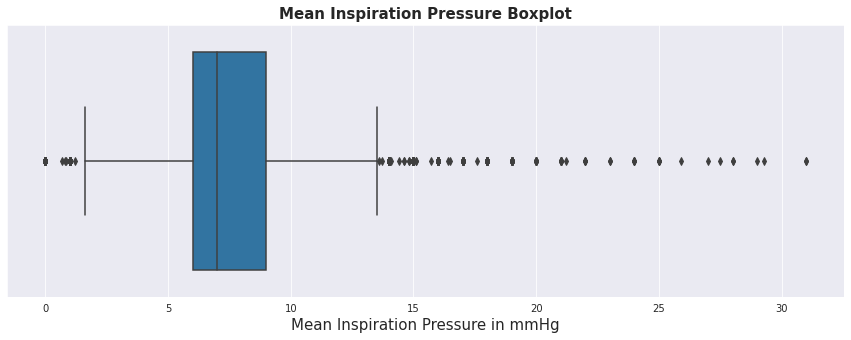

In [186]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(df_raw.mean_insp_pressure)
ax.set_title("Mean Inspiration Pressure Boxplot", fontsize=15, fontweight="bold")
ax.set_xlabel('Mean Inspiration Pressure in mmHg', fontsize=15);

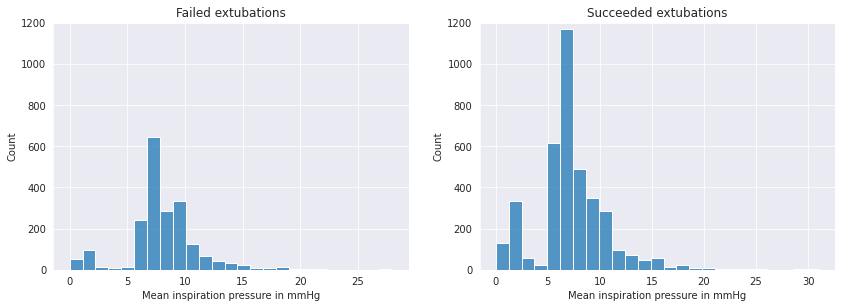

In [187]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.histplot(df_raw[df_raw.label==0].mean_insp_pressure, bins=25)
ax1.set_ylim(0,1200)
plt.xlabel('Mean inspiration pressure in mmHg')
plt.title('Failed extubations')

ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.histplot(df_raw[df_raw.label==1].mean_insp_pressure, bins=25)
ax2.set_ylim(0, 1200)
plt.xlabel('Mean inspiration pressure in mmHg')
plt.title('Succeeded extubations');

# Leukocytes

In [188]:
cleaning(df_raw.leuko, True)

Amount of unique values: 479
More than 20 unique values. No printing of details.

Replace the non numeric entries by numeric entries or NaN. Restart the cleaning function, after replacement.
[[83, '19.5 19.5'], [119, '8.9 8.9'], [121, '5 5'], [124, '10.2 10.2'], [306, '10.3 10.3'], [310, '13.3 13.3'], [435, '10.2 10.2'], [501, '6.3 6.3'], [578, '9.1 9.1'], [580, '92.4 92.4'], [691, '4 4'], [697, '15.5 15.5'], [705, '8.4 8.4'], [799, '5.5 5.5'], [831, '6.7 6.7'], [874, '20.5 20.5'], [951, '<0.1*'], [981, '10.5 10.5'], [1001, '22.3 22.3'], [1063, '10.1 10.1'], [1092, '16.7 16.7'], [1116, '6.8 6.8'], [1160, '9.4 9.4'], [1412, '11.8 11.8'], [1603, '4.4 4.4'], [1671, '8.1 8.1'], [1754, '<0.1*'], [1758, '11.2 11.2'], [1764, '20 20'], [1786, '16.4 16.4'], [1865, '13.7 13.7'], [1866, '6.5 6.5'], [1902, '14.3 14.3'], [1965, '17.4 17.4'], [2029, '10.7 10.7'], [2055, '9.8 9.8'], [2078, '13 13'], [2124, '9.6 9.6'], [2141, '15.7 15.7'], [2168, '42 42'], [2350, '11.5 11.5'], [2535, '8.6 8.6'], [2581

In [189]:
df_raw.sort_values('leuko', ascending=False).leuko.unique()

array(['<0.1*', '92.4 92.4', '9.9', '9.8 9.8', '9.8', '9.7', '9.6 9.6',
       '9.6', '9.5', '9.4 9.4', '9.4', '9.3 9.3', '9.3', '9.2', '9.1 9.1',
       '9.1', '9.0', '9 9', '9', '85.4', '81.3', '8.9 8.9', '8.9',
       '8.8 8.8', '8.8', '8.7 8.7', '8.7', '8.6 8.6', '8.6', '8.5',
       '8.4 8.4', '8.4', '8.3 8.3', '8.3', '8.2 8.2', '8.2', '8.1 8.1',
       '8.1', '8.0', '8 8', '8', '74.2', '73.9', '70.8', '7.9', '7.8 7.8',
       '7.8', '7.7', '7.6', '7.5', '7.4', '7.3 7.3', '7.3', '7.2 7.2',
       '7.2', '7.1', '7.0 7.0', '7.0', '7', '68.3', '67.1', '66.7',
       '65.9', '62.9', '6.9', '6.8 6.8', '6.8', '6.7 6.7', '6.7', '6.6',
       '6.5 6.5', '6.5', '6.4', '6.3 6.3', '6.3', '6.2', '6.1', '6.0',
       '6', '59.9', '58.7', '54.8', '54.2', '53.7', '51.6', '50.2',
       '5.95', '5.9', '5.8', '5.7', '5.6 5.6', '5.6', '5.5 5.5', '5.5',
       '5.4', '5.3', '5.2', '5.1', '5.0', '5 5', '5', '48.9', '471.7',
       '46.5', '46.3', '45.7', '44.2', '42.9', '42.6', '42.3', '42 42',
     

In [190]:
len(df_raw[df_raw.leuko == '<0.1*'])

2

In [191]:
df_raw.leuko = df_raw.leuko.replace(to_replace= '<0.1*', value= 0.1)

In [192]:
df_raw.leuko = df_raw.leuko.astype(str)

In [193]:
df_raw.leuko = df_raw.leuko.apply(lambda x: x.split(' ')[0] if ' ' in x else x)

In [194]:
df_raw.leuko = df_raw.leuko.astype(float)

In [195]:
len(df_raw[df_raw.leuko > 55])

16

We think this values are typos. Becaues if we exclude the leukemia it is medicaly impossible to 
get higher than 55 x 10<sup>3</sup>/μL). We replace them by the value divided by 10.

In [196]:
a = list(df_raw[df_raw.leuko > 55].leuko.unique())
for i in a:
   df_raw.leuko = df_raw.leuko.replace(to_replace= i , value= i/10)

In [197]:
df_raw.leuko = replacement(df_raw.leuko, 'median')

Amount of unique values: 380
More than 20 unique values. No printing of details.

Missing in leuko: 0.0%
Null-Values: 0



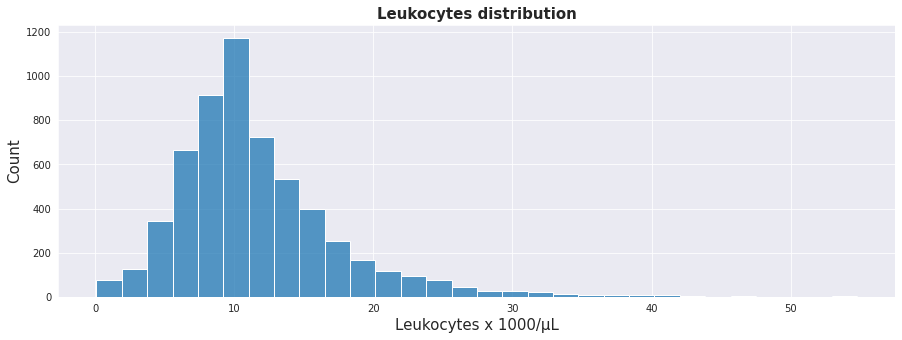

In [198]:
plt.figure(figsize=(15,5))
ax = sns.histplot(df_raw.leuko, bins=30)
ax.set_title("Leukocytes distribution", fontsize=15, fontweight="bold")
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Leukocytes x 1000/μL', fontsize=15);

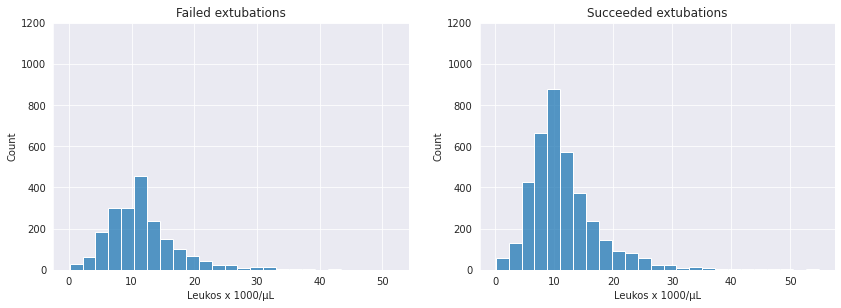

In [199]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.histplot(df_raw[df_raw.label==0].leuko, bins=25)
ax1.set_ylim(0,1200)
plt.xlabel('Leukos x 1000/μL')
plt.title('Failed extubations')

ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.histplot(df_raw[df_raw.label==1].leuko, bins=25)
ax2.set_ylim(0, 1200)
plt.xlabel('Leukos x 1000/μL')
plt.title('Succeeded extubations');

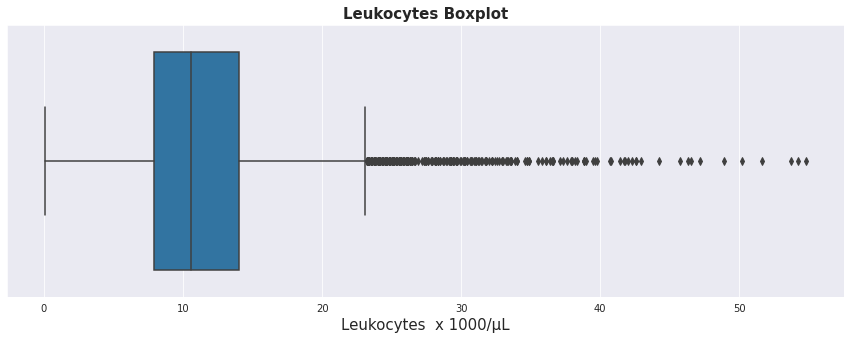

In [200]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(df_raw.leuko)
ax.set_title("Leukocytes Boxplot", fontsize=15, fontweight="bold")
ax.set_xlabel('Leukocytes  x 1000/μL', fontsize=15);

# Lactic Acid 

In [201]:
cleaning(df_raw.lactic_acid, True)

Amount of unique values: 152
More than 20 unique values. No printing of details.

Replace the non numeric entries by numeric entries or NaN. Restart the cleaning function, after replacement.
[[29, '.5 .5'], [83, '1.3 1.3'], [119, '2.8 2.8'], [121, '2.4 2.4'], [306, '1.1 1.1'], [310, '1.8 1.8'], [422, '1.7 1.7'], [434, '.8 .8'], [435, '.9 .9'], [578, '.9 .9'], [691, '.9 .9'], [697, '2 2'], [705, '.9 .9'], [799, '1.1 1.1'], [831, '1.8 1.8'], [874, '1.7 1.7'], [981, '2.3 2.3'], [1001, '1.2 1.2'], [1063, '.9 .9'], [1074, '1.4 1.4'], [1092, '1 1'], [1116, '1.1 1.1'], [1412, '1.3 1.3'], [1603, '1.2 1.2'], [1671, '1.6 1.6'], [1758, '1.7 1.7'], [1764, '1 1'], [1786, '1.8 1.8'], [1865, '1.1 1.1'], [1884, '.9 .9'], [1902, '1.4 1.4'], [1965, '1.5 1.5'], [2029, '1.3 1.3'], [2078, '1.3 1.3'], [2168, '7.9 7.9'], [2252, 'no data'], [2350, '1.8 1.8'], [2535, '2.3 2.3'], [2536, '1.4 1.4'], [2581, '1 1'], [2590, '1.8 1.8'], [2591, '13.6 13.6'], [2601, '1.7 1.7'], [2658, '.7 .7'], [2677, '1.7 1.7'], [268

In [202]:
df_raw.lactic_acid= df_raw.lactic_acid.astype(str)

In [203]:
df_raw.lactic_acid = df_raw.lactic_acid.apply(lambda x: x.split(' ')[0] if ' ' in x else x)

In [204]:
cleaning(df_raw.lactic_acid, True)

Amount of unique values: 129
More than 20 unique values. No printing of details.

Replace the non numeric entries by numeric entries or NaN. Restart the cleaning function, after replacement.
[[2252, 'no']] 

Missing in lactic_acid: 0.0%
Null-Values: 0



In [205]:
df_raw.lactic_acid = df_raw.lactic_acid.replace(to_replace= 'no', value= np.nan)

In [206]:
cleaning(df_raw.lactic_acid, True)

Amount of unique values: 128
More than 20 unique values. No printing of details.

Missing in lactic_acid: 0.02%
Null-Values: 1



In [207]:
df_raw.lactic_acid= df_raw.lactic_acid.astype(float)

In [208]:
len(df_raw[df_raw.lactic_acid> 20])

6

We think this values are typos.  We replace them by the value divided by 10.

In [209]:
a = list(df_raw[df_raw.lactic_acid >20].lactic_acid.unique())
for i in a:
    df_raw.lactic_acid = df_raw.lactic_acid.replace(to_replace= i , value= i/10)

In [210]:
df_raw[['pH', 'base_excess','Pa02', 'lactic_acid']]

,pH,base_excess,Pa02,lactic_acid
0,7.43,2.0,86.0,NaN
1,7.52,4.0,171.0,1.1
2,7.41,10.0,39.0,1.0
3,7.39,2.0,365.0,NaN
4,7.47,5.0,143.0,1.3
...,...,...,...,...
5831,7.41,0.0,236.0,NaN
5832,7.42,0.0,85.0,1.7
5833,7.48,-1.0,223.0,NaN
5834,7.42,0.0,158.0,1.0


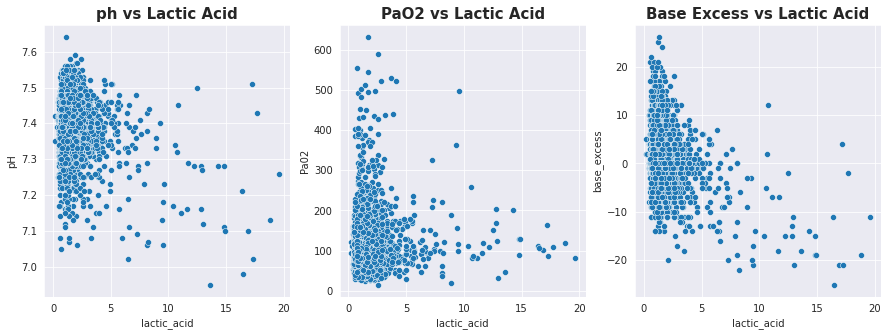

In [211]:
fig, ax =plt.subplots(1,3,figsize=(15, 5))
sns.set_style("ticks")
ax1 = sns.scatterplot(x = df_raw.lactic_acid , y = df_raw.pH, ax=ax[0])
ax2 = sns.scatterplot(x = df_raw.lactic_acid , y = df_raw.Pa02, ax=ax[1])
ax3 = sns.scatterplot(x = df_raw.lactic_acid , y = df_raw.base_excess, ax=ax[2])
ax1.set_title("ph vs Lactic Acid", fontsize=15, fontweight="bold")
ax2.set_title("PaO2 vs Lactic Acid", fontsize=15, fontweight="bold")
ax3.set_title("Base Excess vs Lactic Acid", fontsize=15, fontweight="bold");

We cannot see any significant correlation between the values of lactid acid and blood gases. So we going to choose the median as a replacement for the missing values.

In [212]:
df_raw.lactic_acid = replacement(df_raw.lactic_acid, 'median')

Amount of unique values: 118
More than 20 unique values. No printing of details.

Missing in lactic_acid: 0.0%
Null-Values: 0



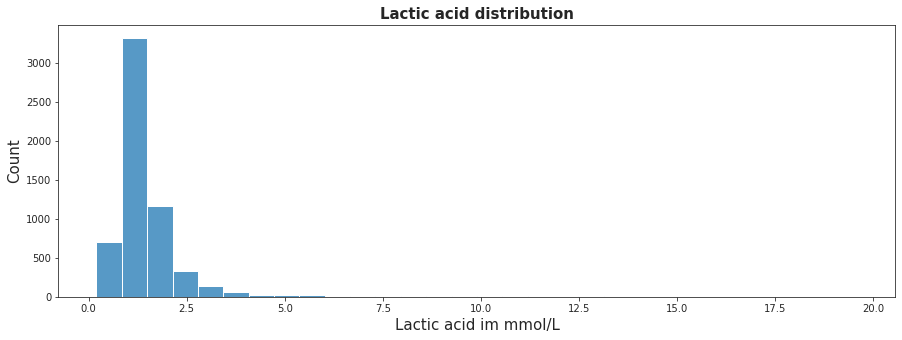

In [213]:
plt.figure(figsize=(15,5))
ax = sns.histplot(df_raw.lactic_acid, bins=30)
ax.set_title("Lactic acid distribution", fontsize=15, fontweight="bold")
ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Lactic acid im mmol/L', fontsize=15);

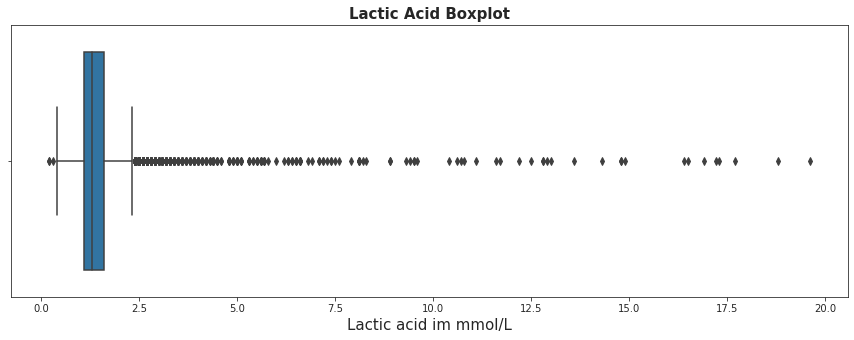

In [214]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(df_raw.lactic_acid)
ax.set_title("Lactic Acid Boxplot", fontsize=15, fontweight="bold")
ax.set_xlabel('Lactic acid im mmol/L', fontsize=15);

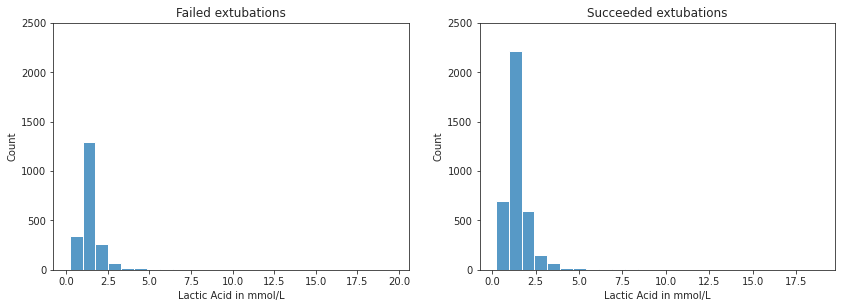

In [215]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.histplot(df_raw[df_raw.label==0].lactic_acid, bins=25)
ax1.set_ylim(0,2500)
plt.xlabel('Lactic Acid in mmol/L')
plt.title('Failed extubations')

ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.histplot(df_raw[df_raw.label==1].lactic_acid, bins=25)
ax2.set_ylim(0, 2500)
plt.xlabel('Lactic Acid in mmol/L')
plt.title('Succeeded extubations');

# Change the names of the columns

In [216]:
df_raw.columns

Index(['label', 'hadm_id', 'icustay_id', 'SUBJECT_ID', 'gender', 'sub_age',
       'numb_diagn', 'last_careunit', 'los', 'tracheo', 'Pa02', 'base_excess',
       'creatinin', 'hb', 'hct', 'pH', 'FiO2', 'PEEP', 'SaO2', 'blood_pr',
       'hr', 'lactic_acid', 'leuko', 'mean_insp_pressure', 'resp_rat',
       'tidal_vol', 'breath_minute_vol'],
      dtype='object')

In [217]:
df_raw.rename(columns={'SUBJECT_ID': 'subject_id',
                  'sub_age': 'age' , 
                  'Pa02': 'PaO2',
                  'mean_insp_pressure':'mean_insp_pr',
                  'breath_minute_vol': 'breath_min_vol'}, inplace=True)

# Export the clean dataframe as csv file

In [218]:
df_raw.to_csv('./data/mimic_clean.csv', index = False)